# Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import lightgbm as lgb
import seaborn as sns

# Data Manipulation

In [2]:
#reading data
data = pd.read_csv("~/OneDrive/Documents/Datakind/DC DHS/Data/InShelterPerDay_Shelter_10-06-2021.csv")
data['date'] = pd.to_datetime(data['date'])
data = data[data['Total']!=0]
#data[['MinTempF','MaxTempF', 'SnowIn', 'PrecipIn', 'FreezingAtEntry', 'Total']] = data[['MinTempF','MaxTempF', 'SnowIn', 'PrecipIn', 'FreezingAtEntry', 'Total']].fillna(0)
#data = data.dropna()
data.head()

name  Total       date  \
2   Catholic Charities - 801 East - LBS ES IND - D...    189 2005-01-01   
3   Catholic Charities - Adams Place - LBS ES IND ...      1 2005-01-01   
6   Catholic Charities - Harriet Tubman - LBS ES I...     28 2005-01-01   
11  Catholic Charities - New York Avenue Shelter -...    174 2005-01-01   
20               COH - Girard Street - ES FAM - DHS M     72 2005-01-01   

    dayWeek  month  day  year  MinTempF  MaxTempF  SnowIn  PrecipIn  \
2         7      1    1  2005     39.92      59.0     0.0       0.0   
3         7      1    1  2005     39.92      59.0     0.0       0.0   
6         7      1    1  2005     39.92      59.0     0.0       0.0   
11        7      1    1  2005     39.92      59.0     0.0       0.0   
20        7      1    1  2005     39.92      59.0     0.0       0.0   

    FreezingAtEntry  
2               0.0  
3               0.0  
6               0.0  
11              0.0  
20              0.0

In [3]:
#filtering out data
data = data[~data['year'].isin([2005, 2021])]

In [4]:
data.describe()

Total       dayWeek         month           day          year  \
count  81082.000000  81082.000000  81082.000000  81082.000000  81082.000000   
mean      98.161294      4.001110      6.347451     15.718853   2013.328174   
std      134.281524      2.001646      3.635251      8.783056      4.337006   
min        1.000000      1.000000      1.000000      1.000000   2006.000000   
25%       11.000000      2.000000      3.000000      8.000000   2010.000000   
50%       39.000000      4.000000      6.000000     16.000000   2013.000000   
75%      102.000000      6.000000     10.000000     23.000000   2017.000000   
max      810.000000      7.000000     12.000000     31.000000   2020.000000   

           MinTempF      MaxTempF        SnowIn      PrecipIn  FreezingAtEntry  
count  78844.000000  78580.000000  57772.000000  79077.000000     78844.000000  
mean      46.800466     66.074082      0.047696      0.125436         0.258067  
std       17.399893     18.918067      0.461520      0.354666         0.437574  
min        3.920000     12.020000      0.000000      0.000000         0.000000  
25%       32.000000     50.000000      0.000000      0.000000         0.000000  
50%       44.960000     66.920000      0.000000      0.000000         0.000000  
75%       62.960000     82.940000      0.000000      0.051181         1.000000  
max       82.940000    105.980000     11.614173      7.370079         1.000000

# Correlation Analysis

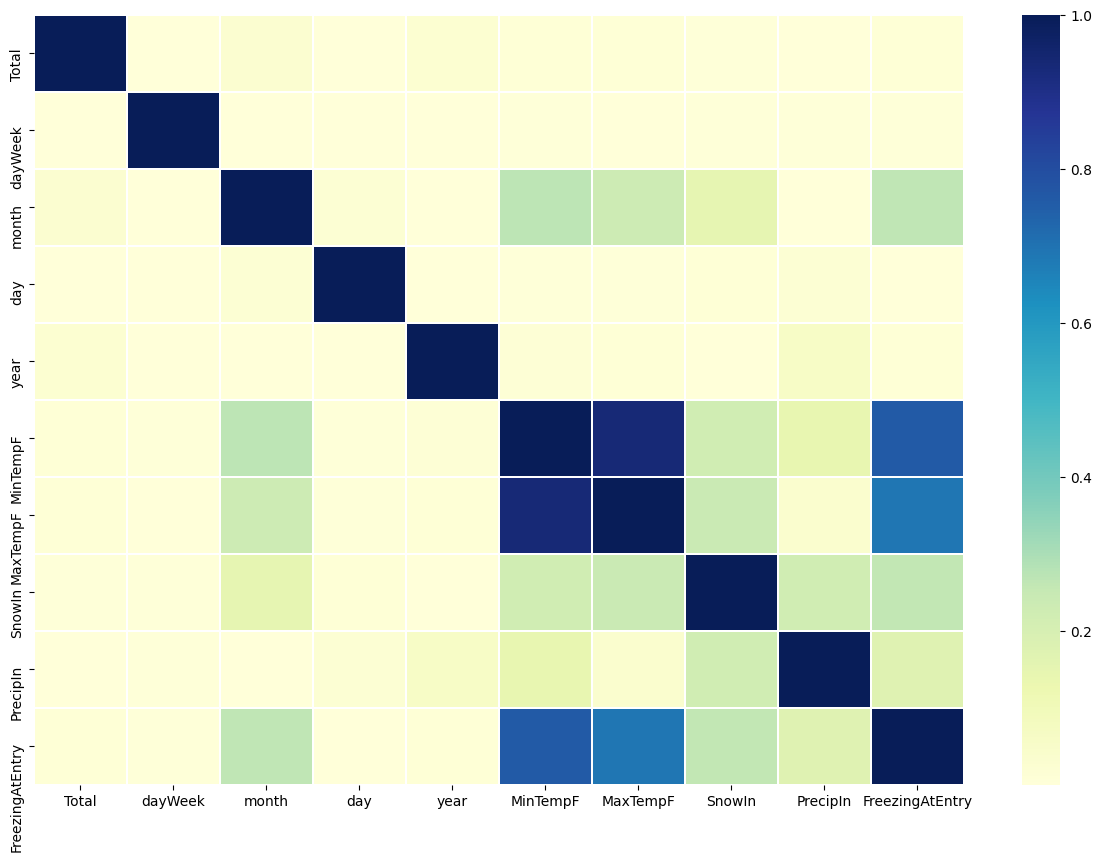

In [5]:
corrmat = data.corr(method = 'spearman')
f,ax = plt.subplots(figsize = (15,10))
sns.heatmap(abs(corrmat), ax = ax , cmap = 'YlGnBu', linewidth = 0.1)
plt.show()

# Multivariate Analysis

Catholic Charities - New York Avenue Shelter - LBS ES IND - DHS M
MAE: 39.665617


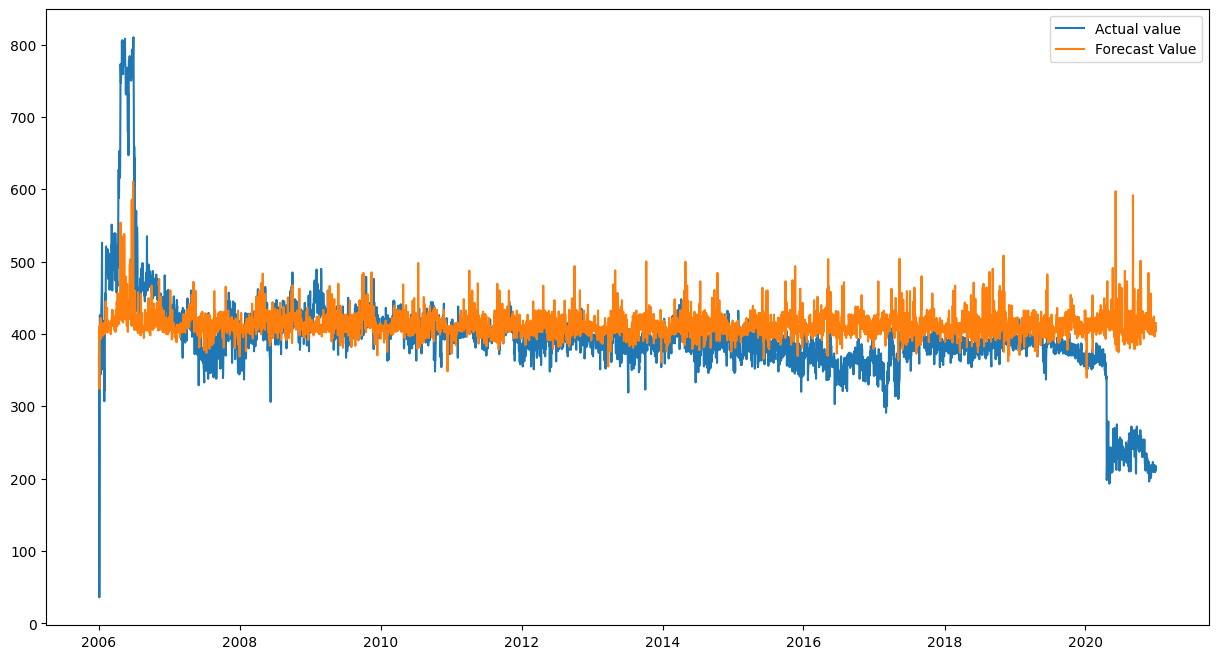

DHS - Pandemic Emergency Program - ES - DHS Direct
MAE: 121.441353


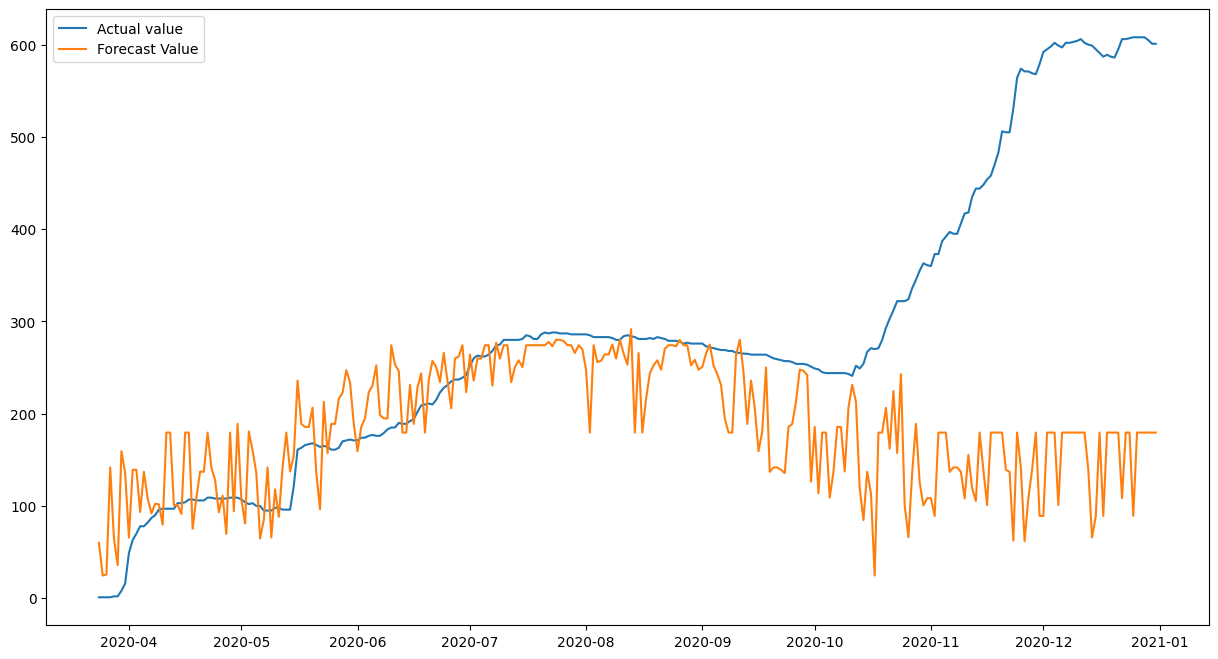

Catholic Charities - 801 East - LBS ES IND - DHS M
MAE: 33.670494


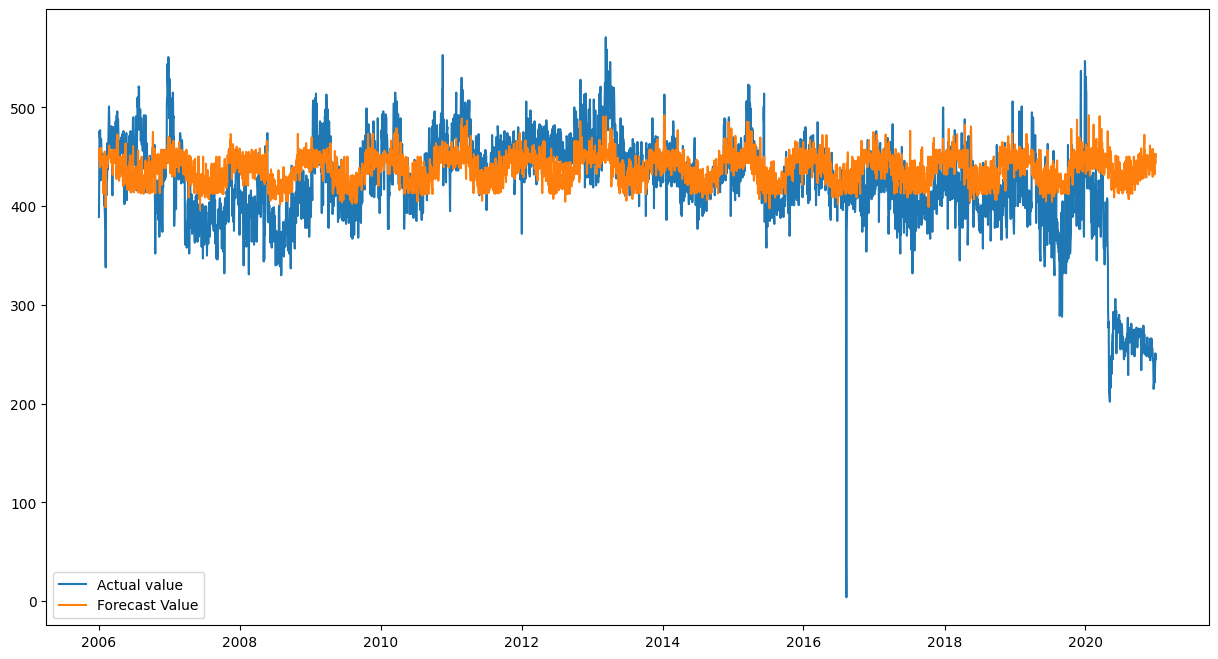

zz - CCNV Hypothermia Beds - ES IND - TCP(closed5/1/2019)
MAE: 32.188351


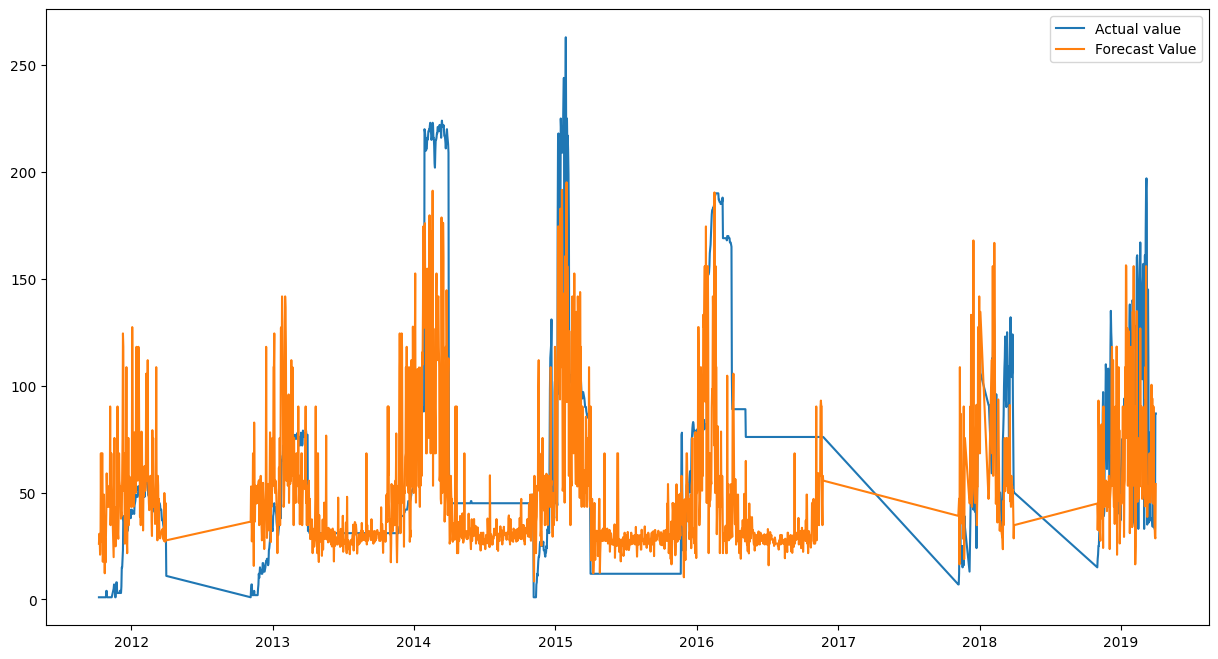

Catholic Charities - Adams Place - LBS ES IND - DHS M
MAE: 28.013786


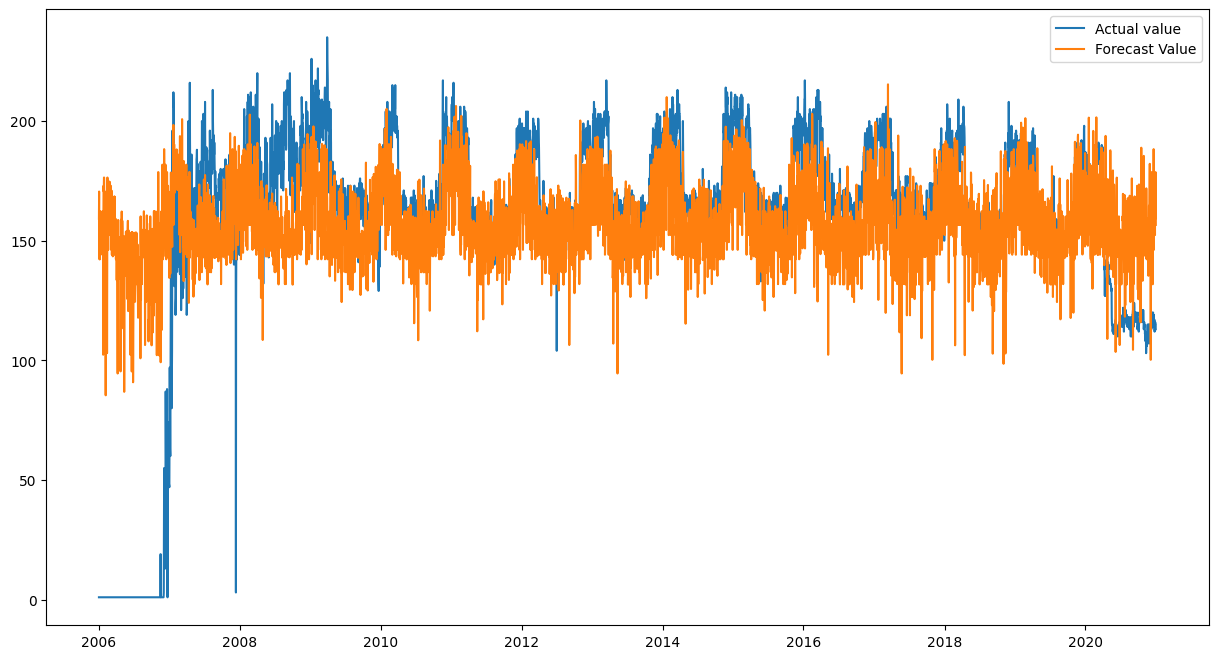

Catholic Charities - Harriet Tubman - LBS ES IND - DHS M
MAE: 7.204473


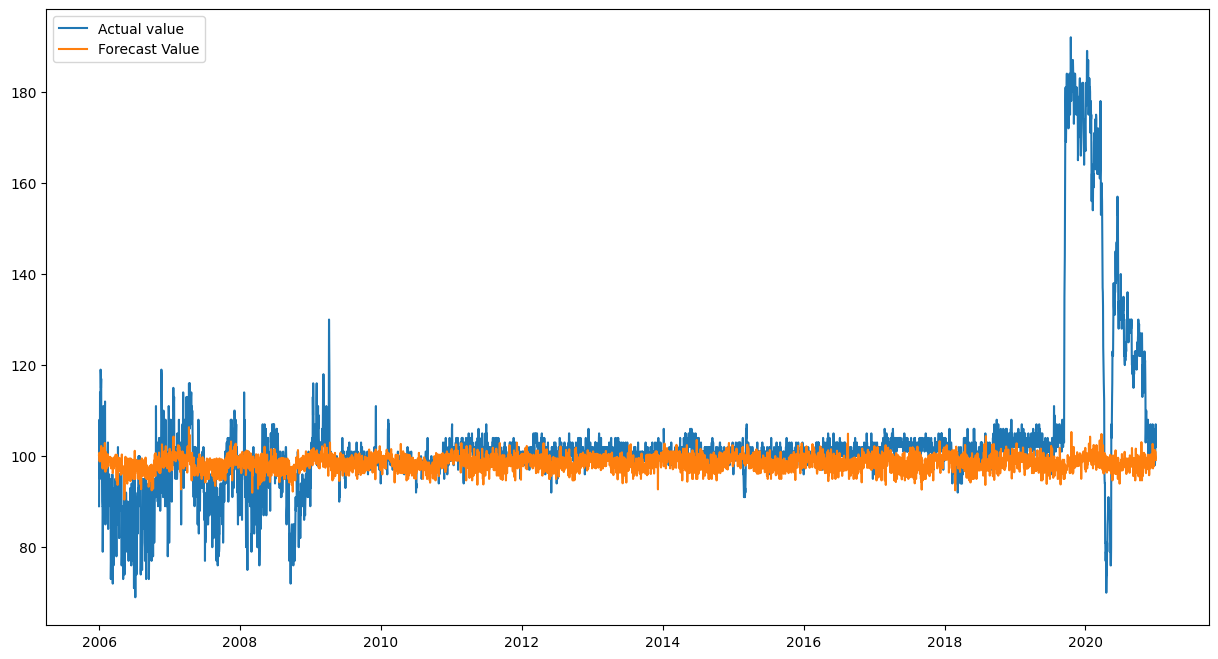

Catholic Charities - Sherwood Emergency Shelter - Hypothermia ES IND - DHS S
MAE: 18.317093


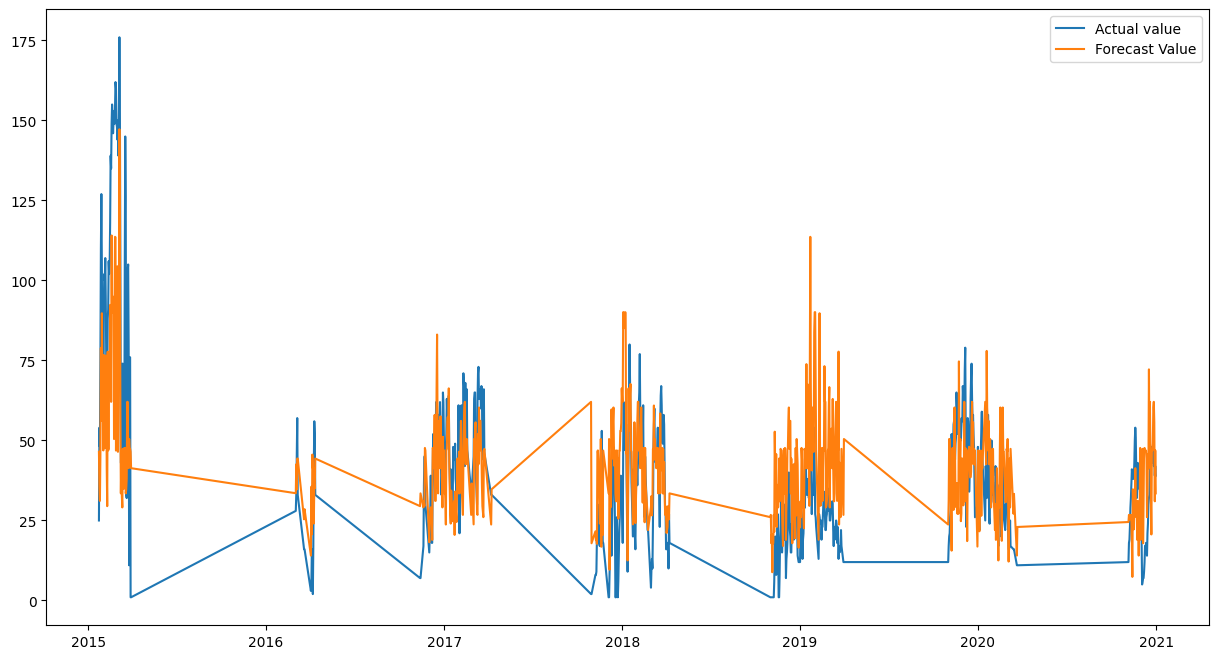

Catholic Charities - Kennedy Rec Center Hypothermia Shelter - ES IND - DHS S
MAE: 23.241194


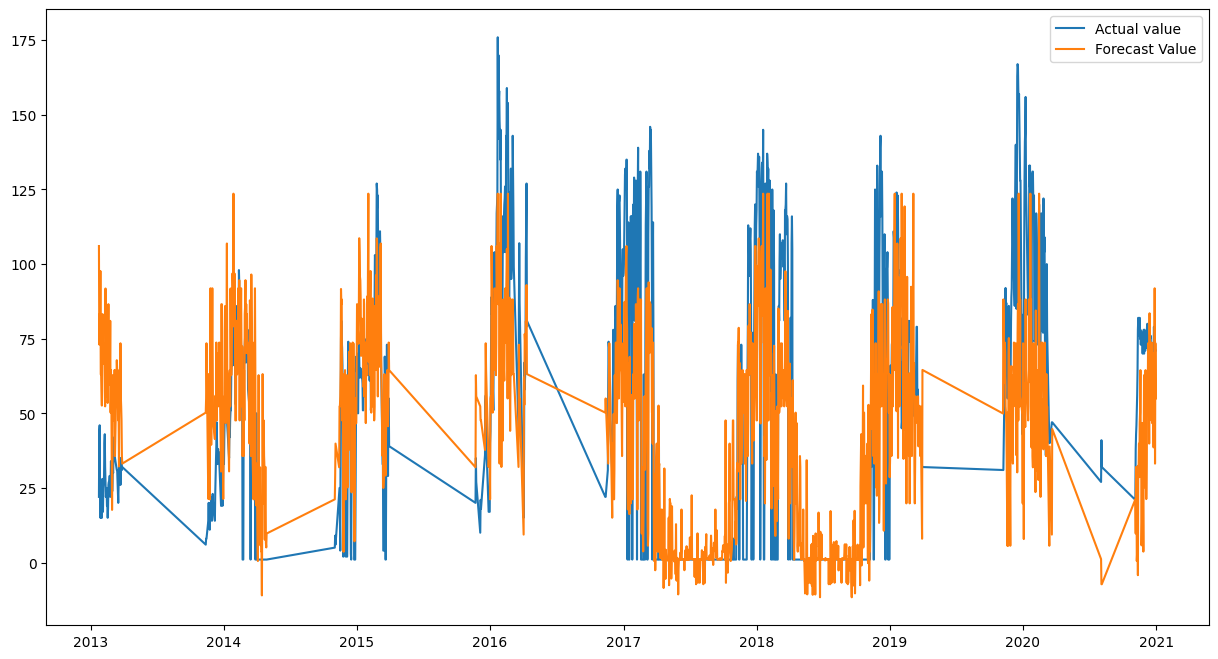

COH - The Triumph - DHS STFH - ES FAM - DHS Direct
MAE: 44.844798


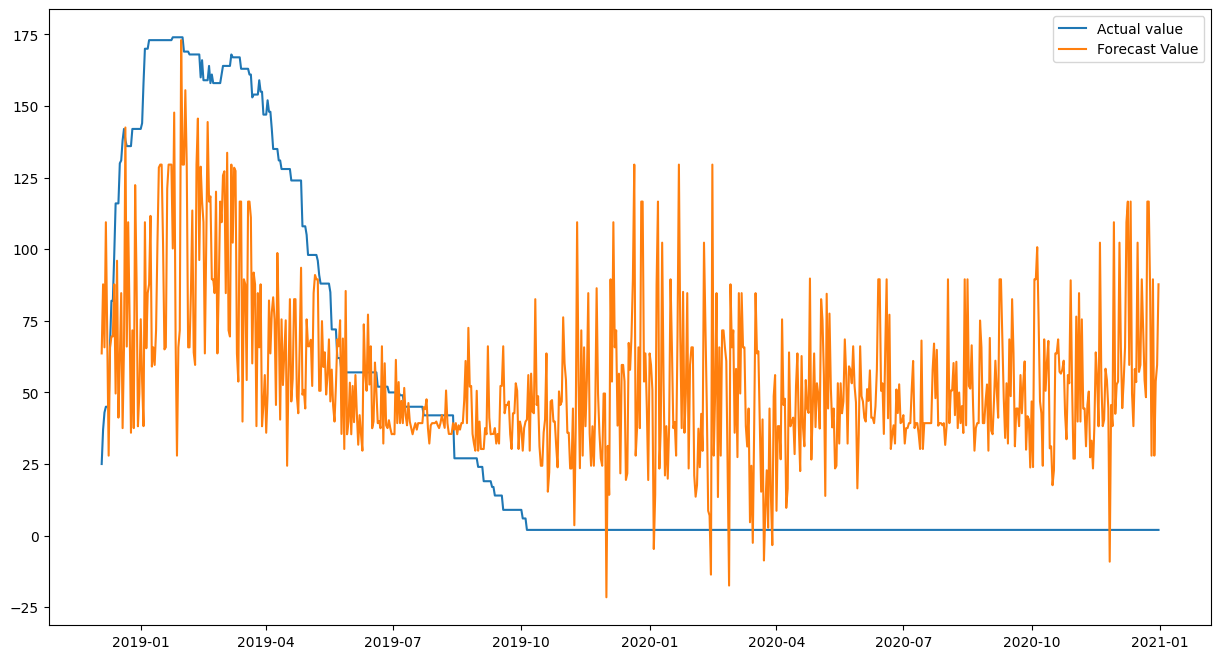

zz - Catholic Charities - Emery Recreation Center - ES IND(closed 9/30/18)
MAE: 43.342902


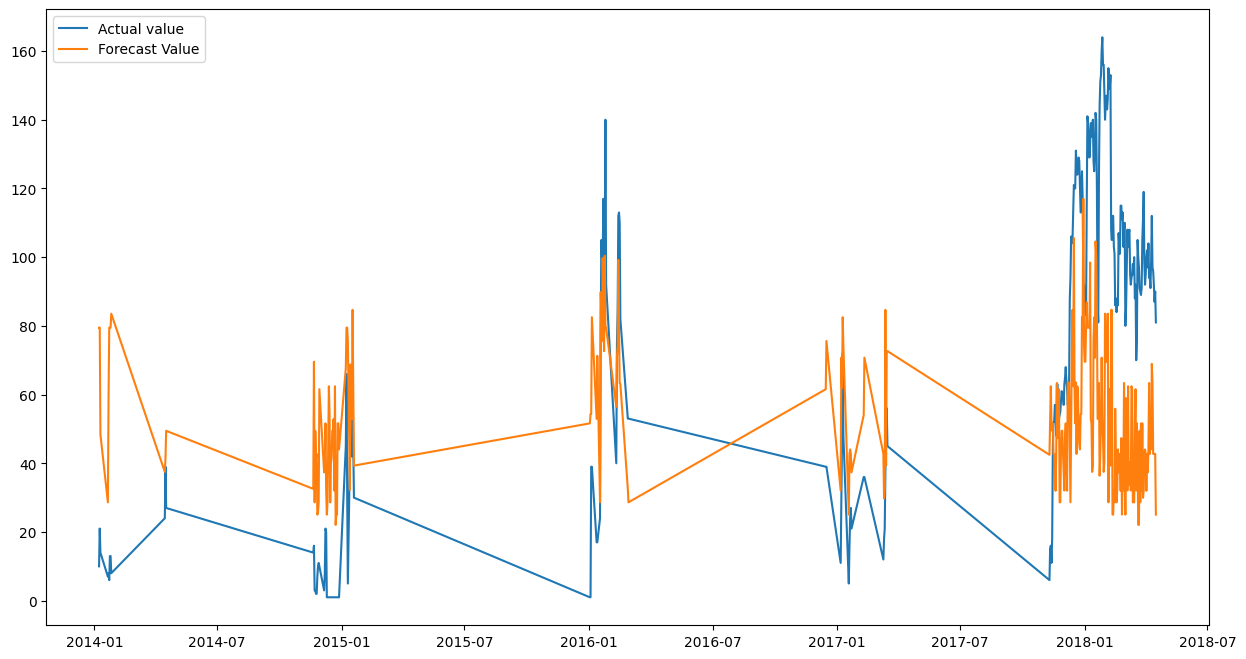

zz - NHM - Abba Hypothermia Shelter for Men (Program)(closed)
MAE: 33.516552


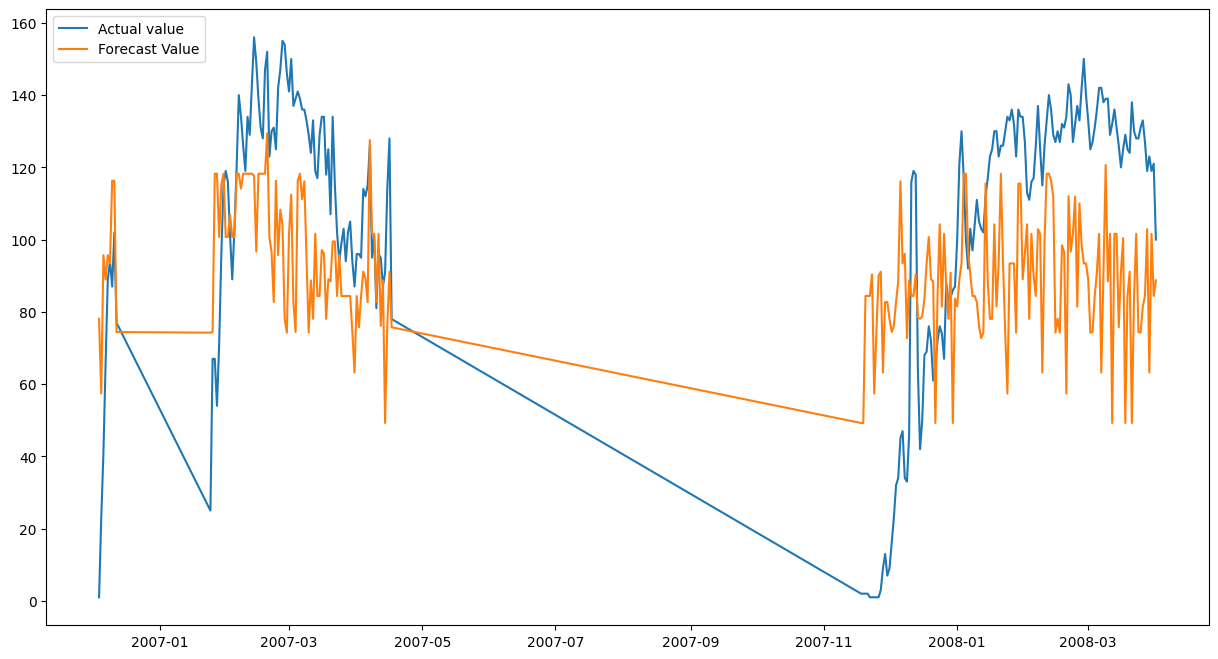

NSV - Patricia Handy - Low-Barrier Shelter - LBS ES IND - DHS M
MAE: 22.413609


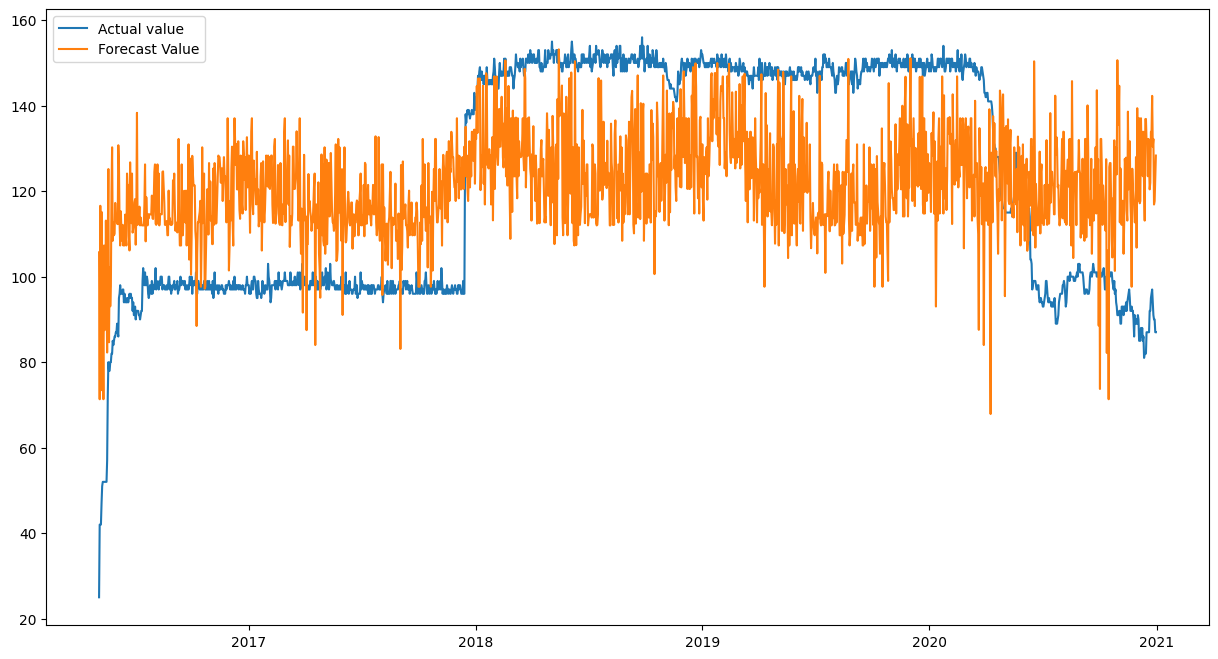

Catholic Charities - King Greenleaf Recreation Center - Hypothermia ES IND - DHS S
MAE: 17.868484


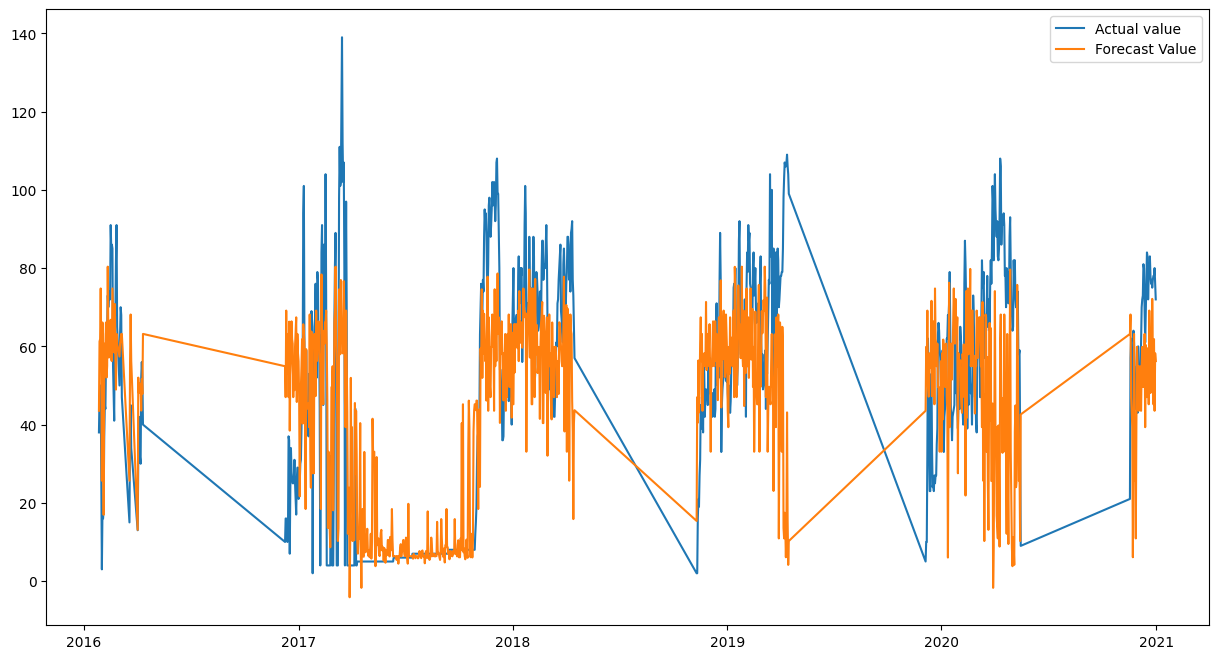

Catholic Charities - Malcolm X Shelter - Hypothermia ES IND - DHS S
MAE: 32.411893


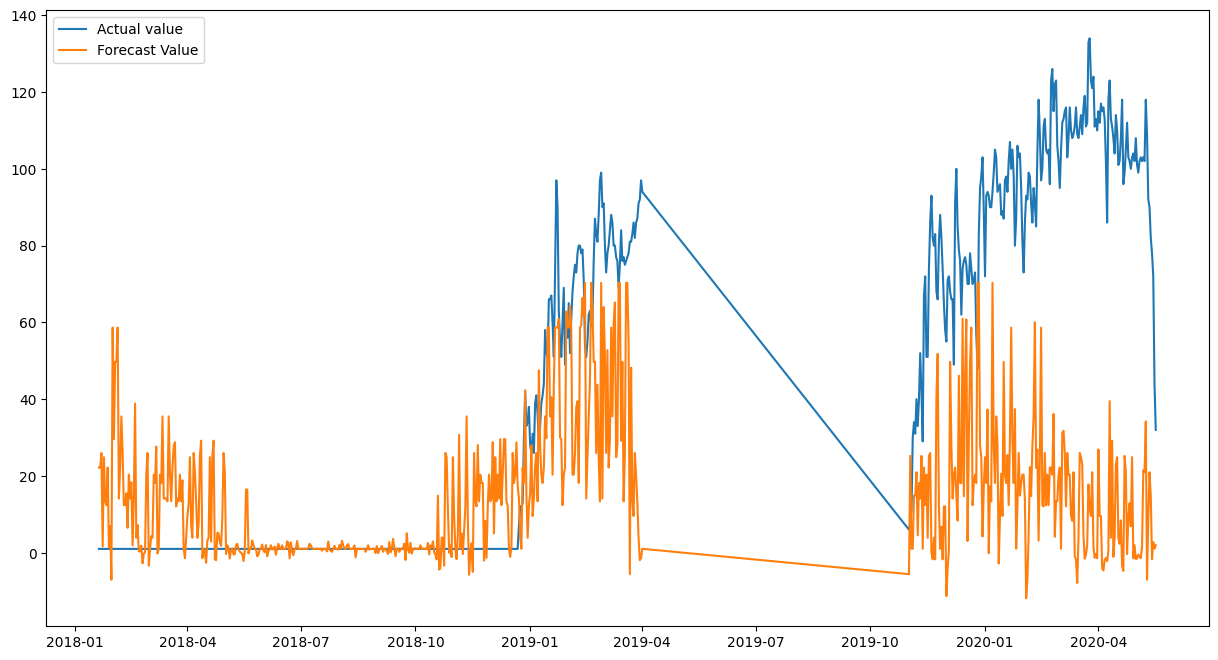

NCCF - The Kennedy - DHS STFH - ES FAM - DHS Direct
MAE: 30.948858


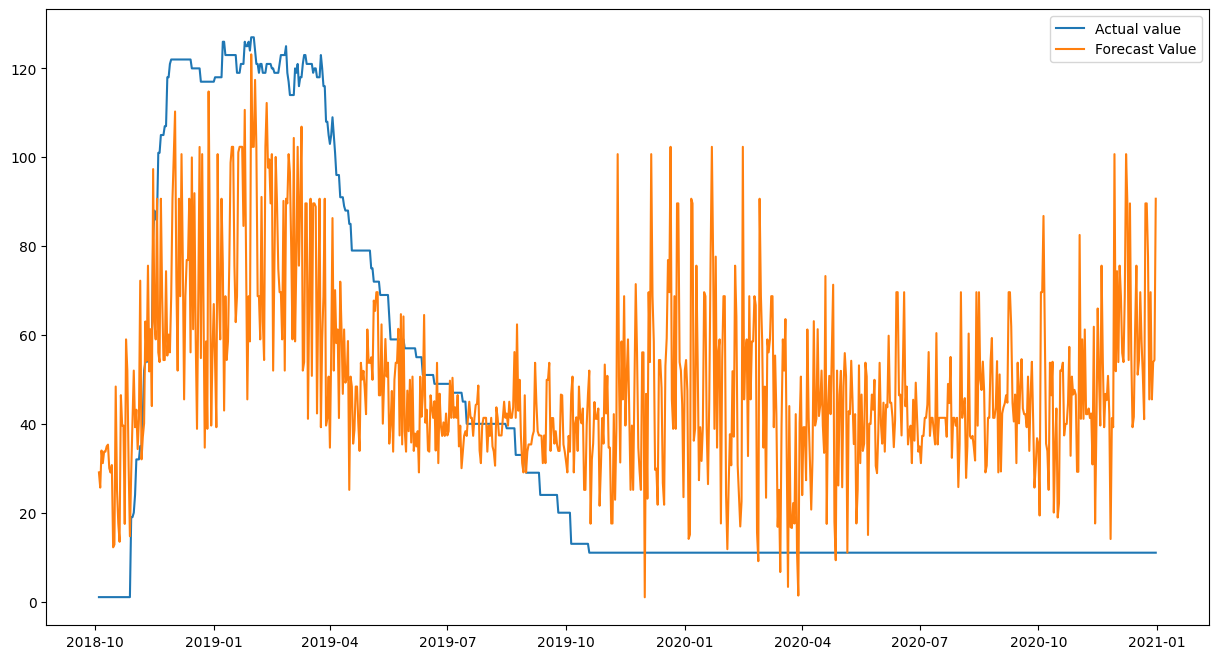

zz - Catholic Charities - Sacred Heart Hypothermia ES IND(closed 2/13/19)
MAE: 12.561239


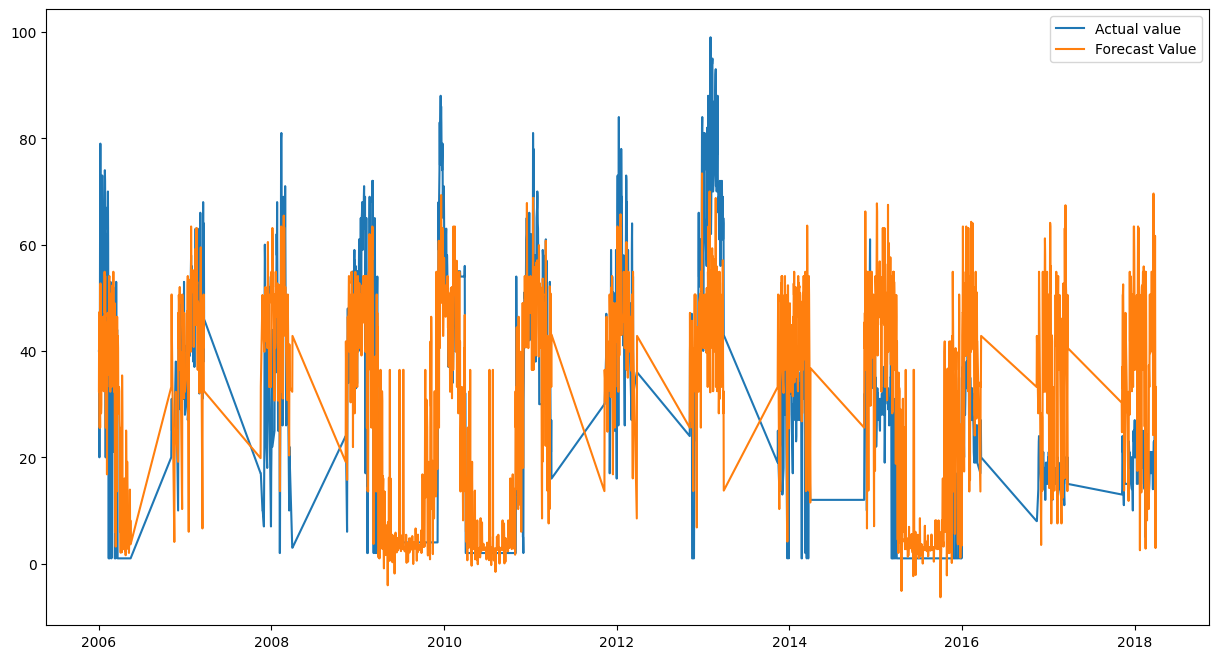

COH - Girard Street - ES FAM - DHS M
MAE: 15.442954


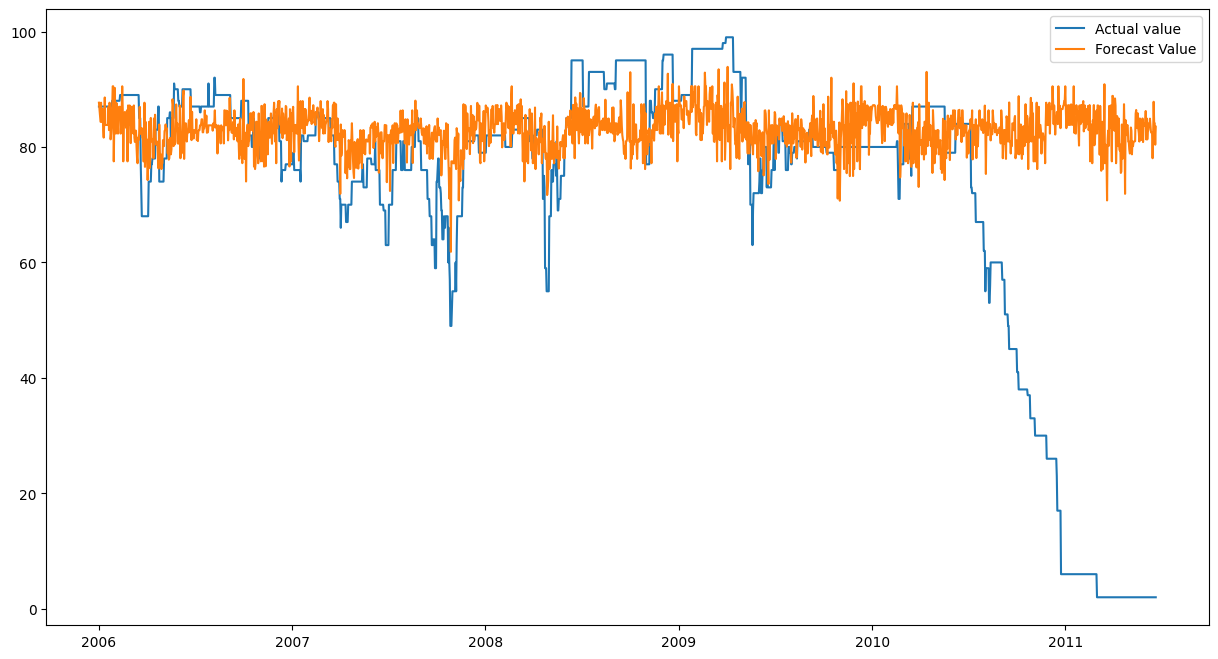

CFTH - Emery Work Bed Program - ES IND - DHS M
MAE: 13.849152


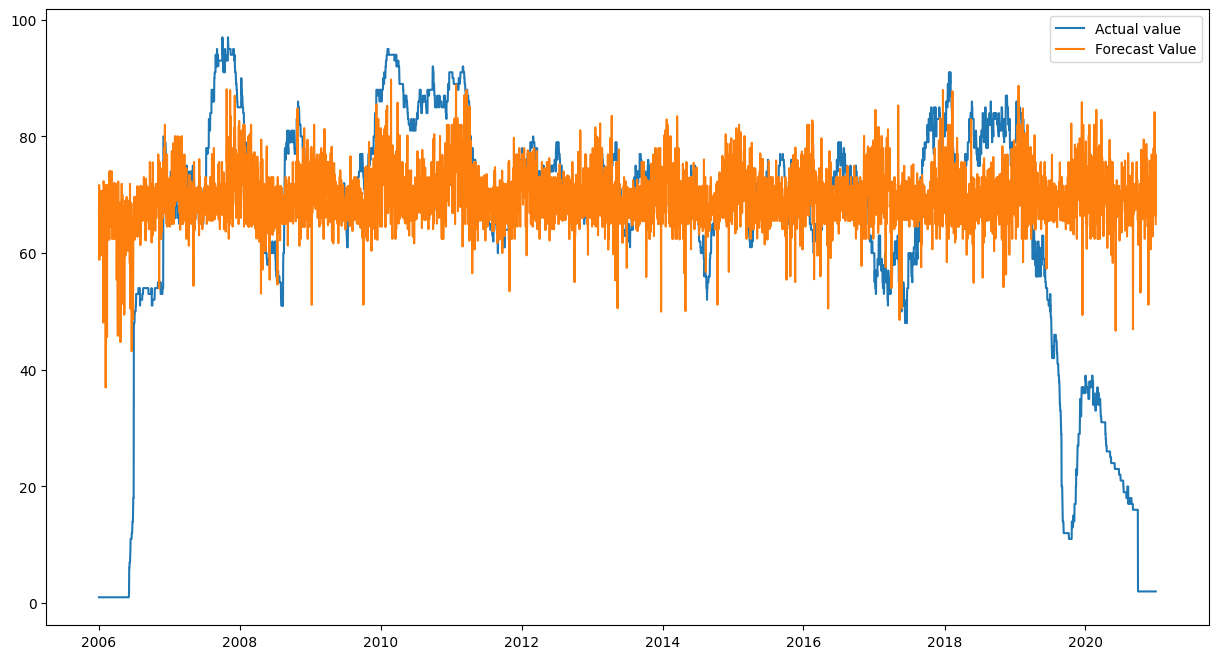

NSV - Patricia Handy - Temporary Shelter - ES IND - DHS M
MAE: 26.144668


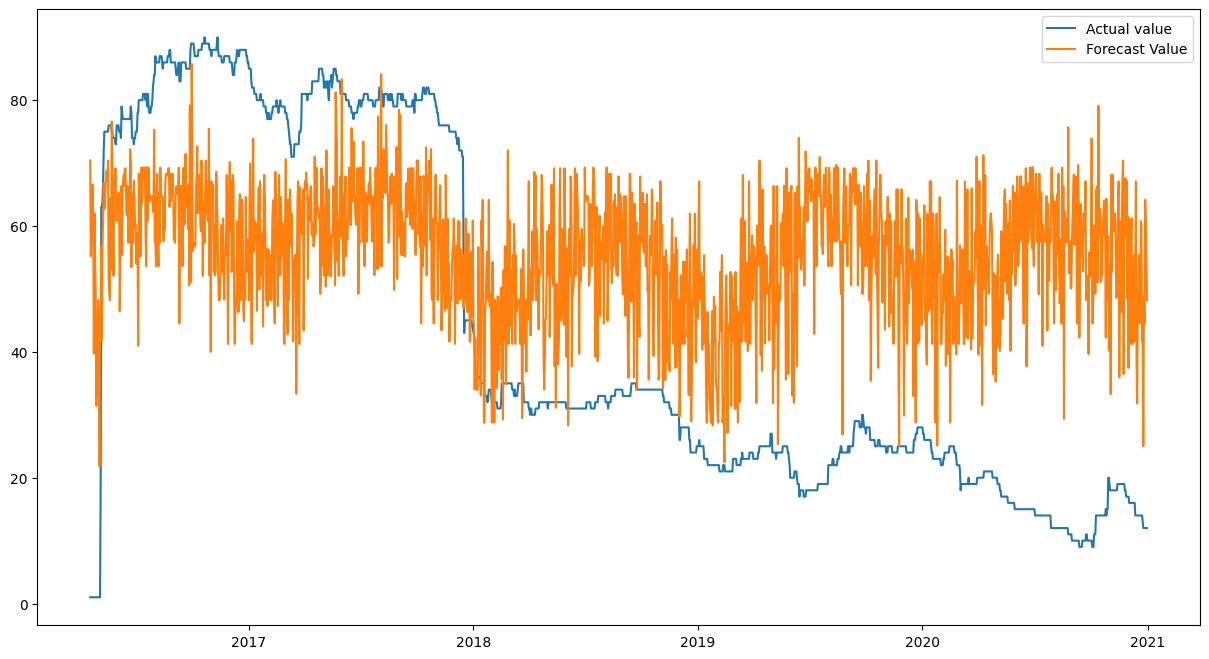

zz - New Hope Ministries - John Young Shelter - ES IND(closed 9/30/12)
MAE: 9.657920


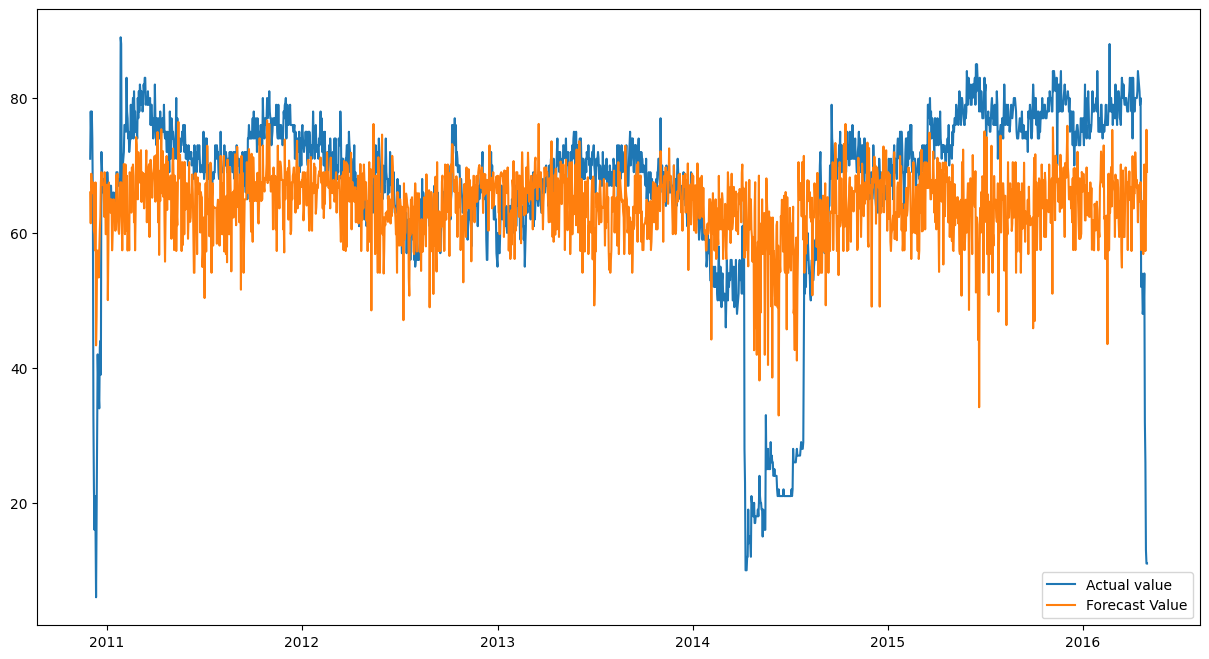

Catholic Charities - Banneker Recreation Center - Hypothermia ES IND - DHS S
MAE: 10.985945


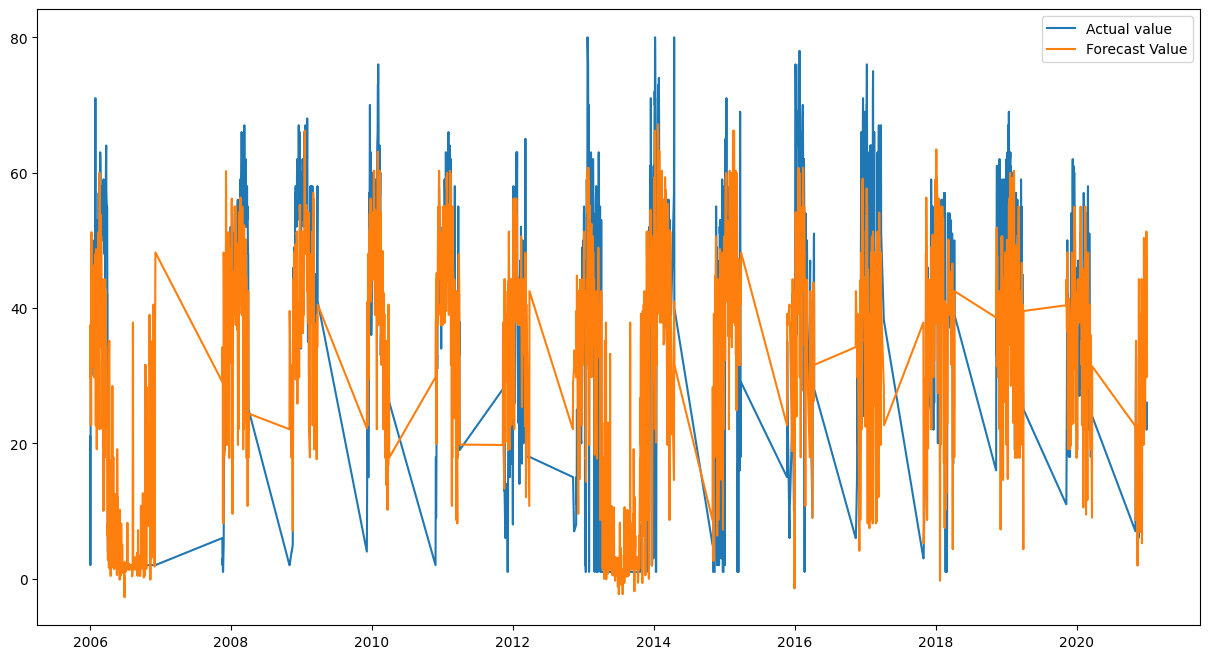

zz - Catholic Charities - Seventh Day Adventist Hypothermia ES IND(closed 2/13/19)
MAE: 9.200142


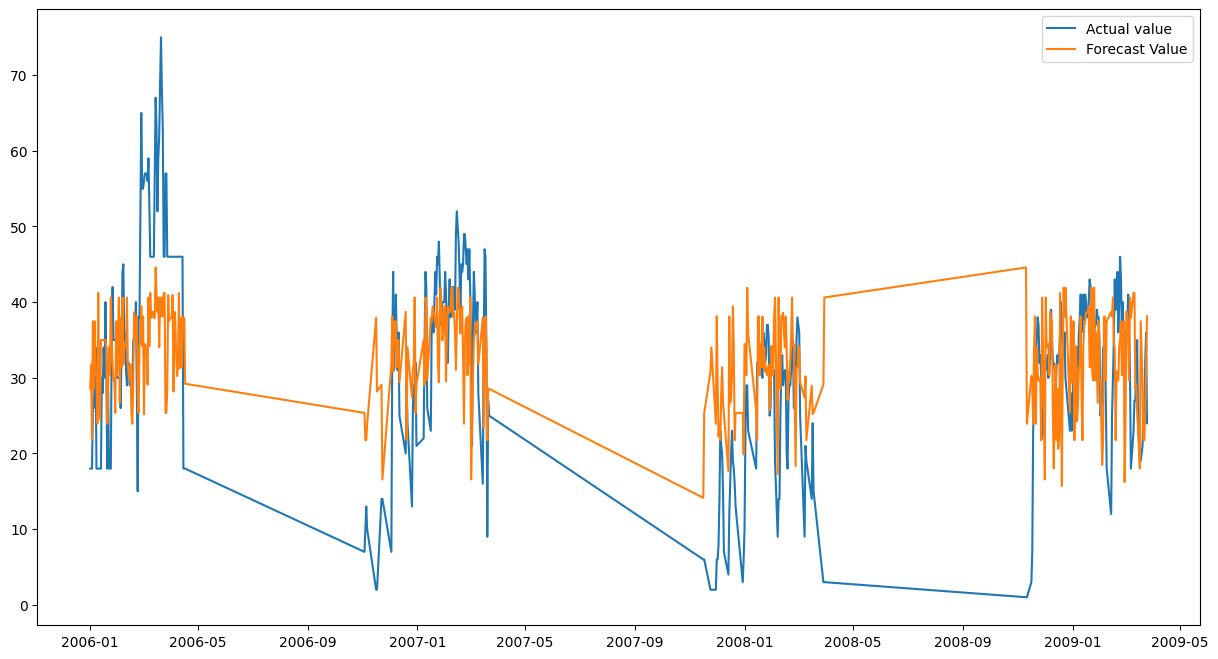

Catholic Charities - Salvation Army Shelter - Hypothermia ES IND - DHS S
MAE: 11.000732


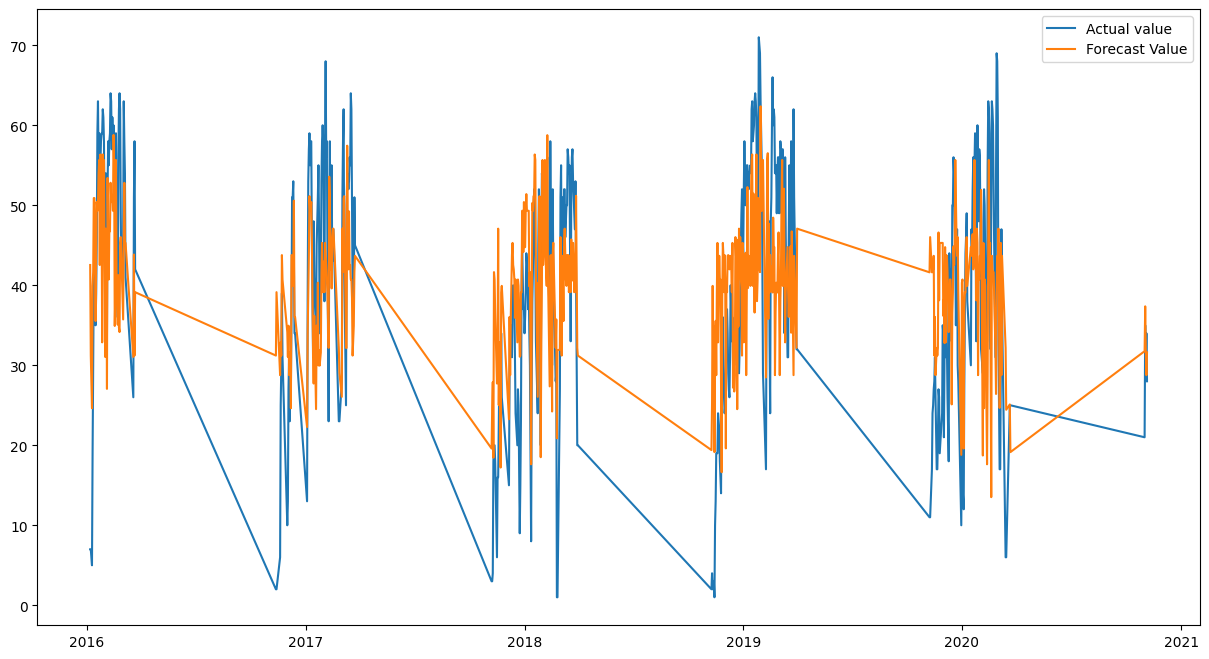

zz - Life Deeds - The Horizon - DHS STFH - ES FAM - DHS Direct(closed 4/15/19)
MAE: 8.215521


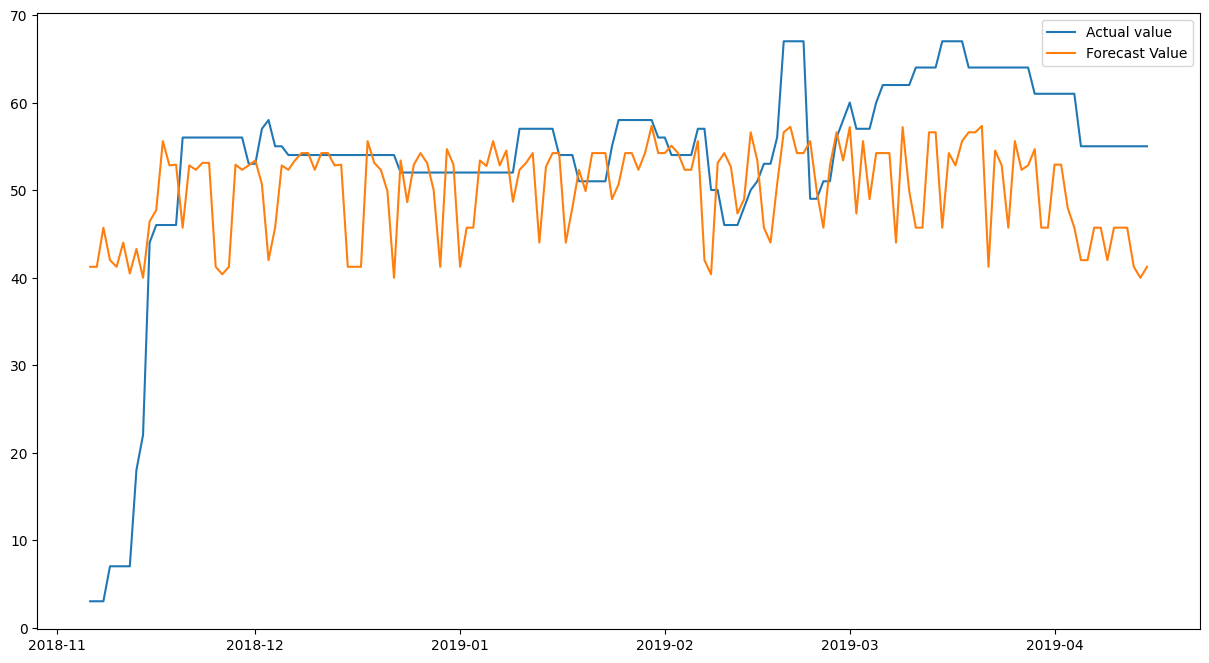

zz - New Hope Ministries - Open Door 12-hr Shelter - ES(closed 9/30/12)
MAE: 11.126094


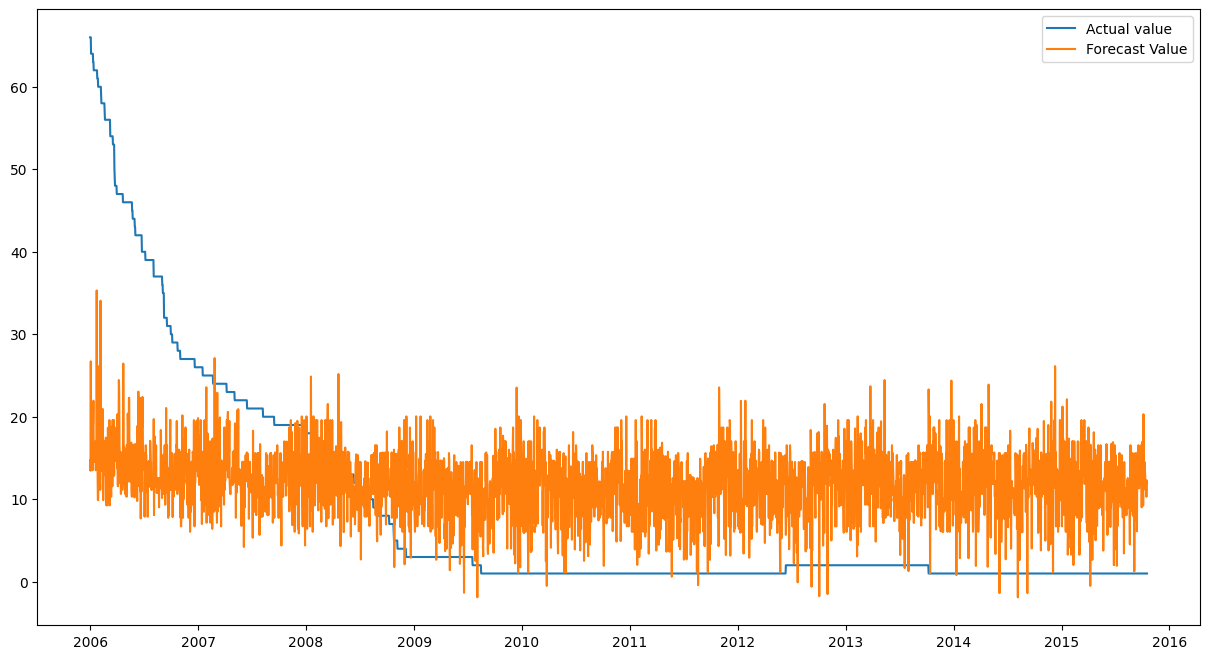

House of Ruth - (Inactive) Madison (old)
MAE: 9.734646


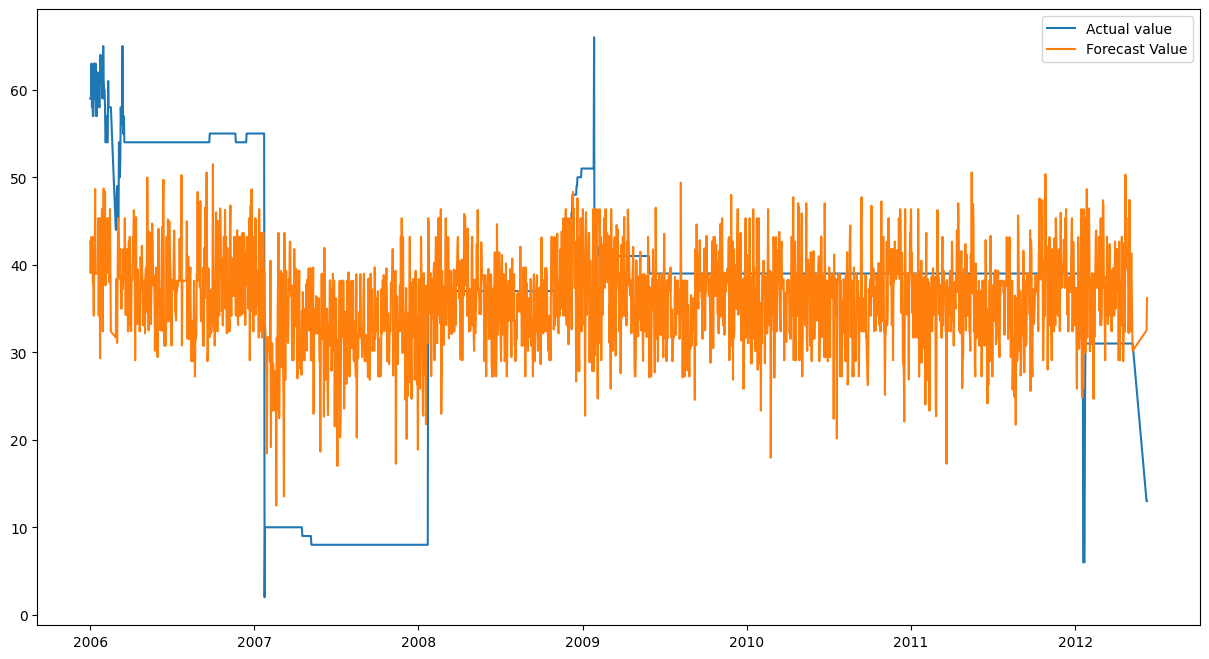

zz - Catholic Charities - Columbia Heights Recreation Center - ES IND(closed 9/30/18)
MAE: 12.098460


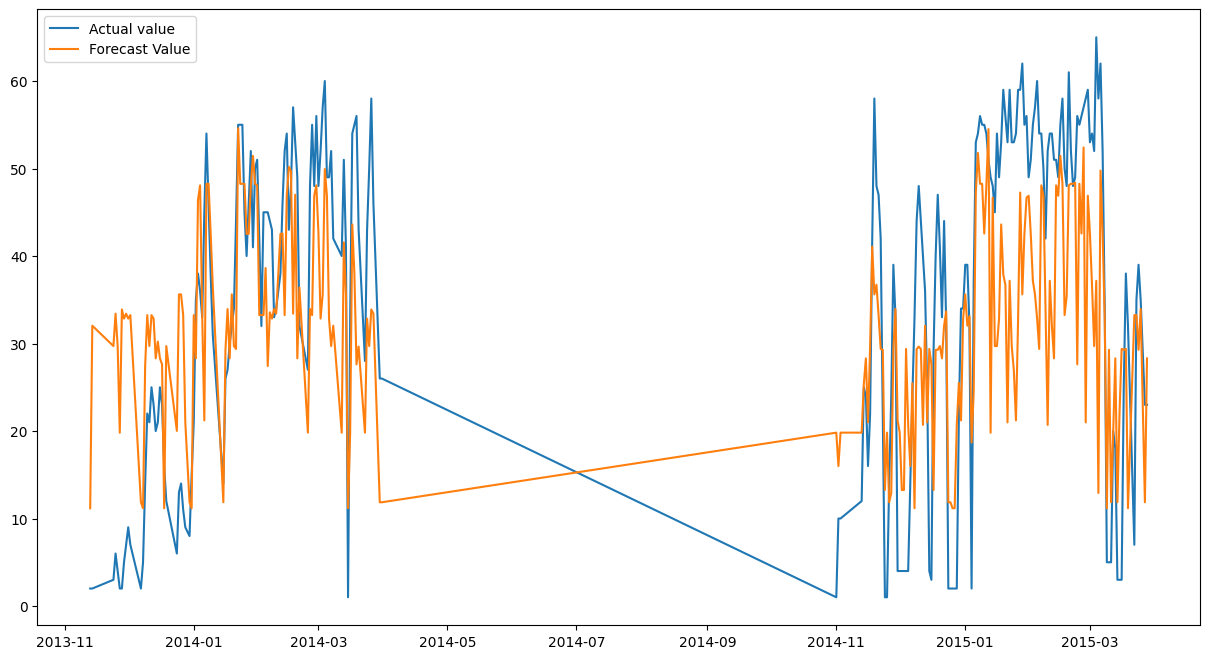

Catholic Charities - Trinidad Hypothermia - LBS ES IND - TCP Direct
MAE: 16.260417


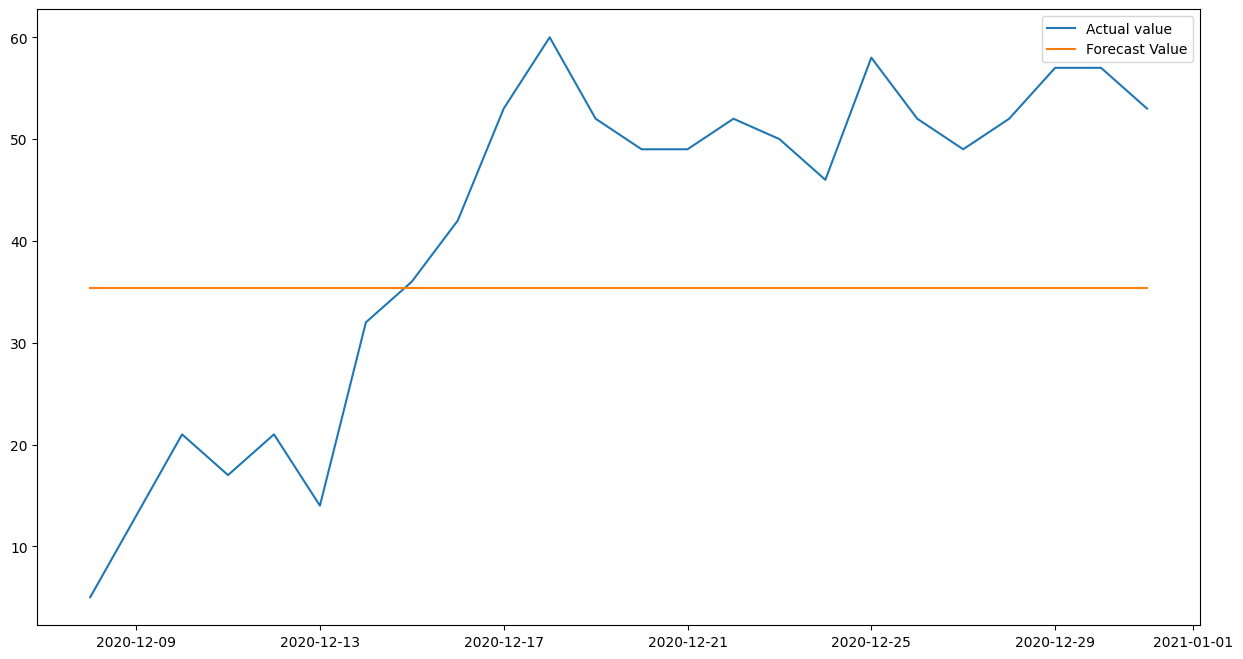

zz - Catholic Charities - Raymond Shelter(closed 2/13/19)
MAE: 9.781962


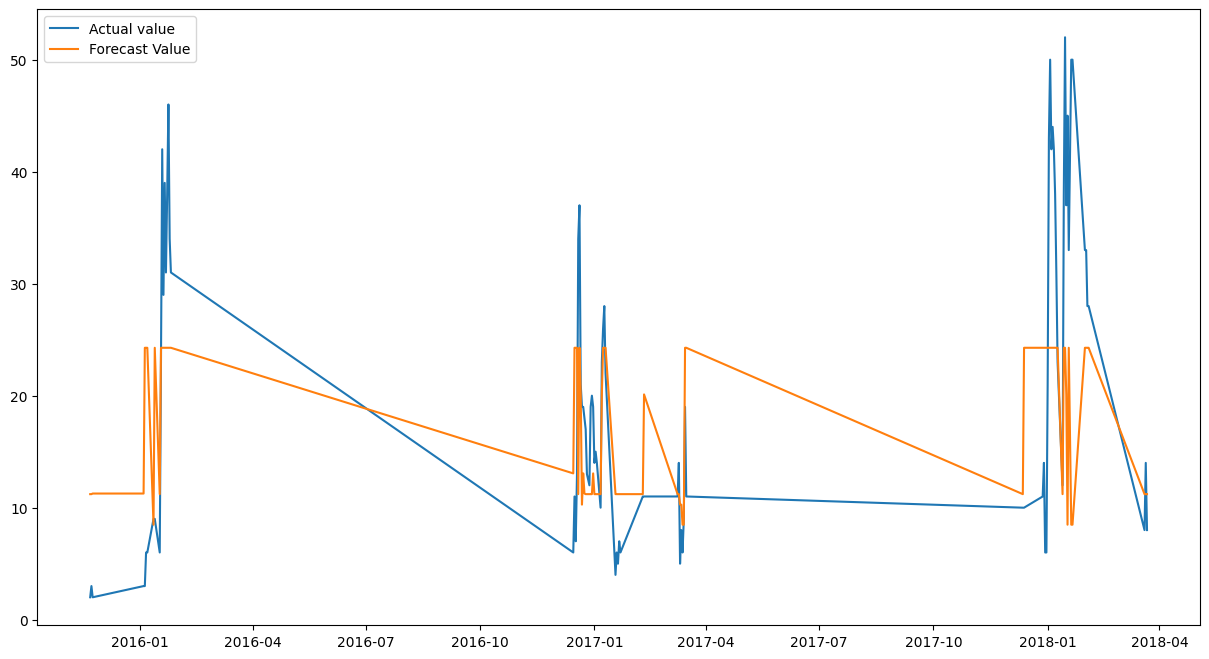

zz - CHW - Safe Haven (Singles) - ES IND - Private(closed 9/30/2019)
MAE: 7.367964


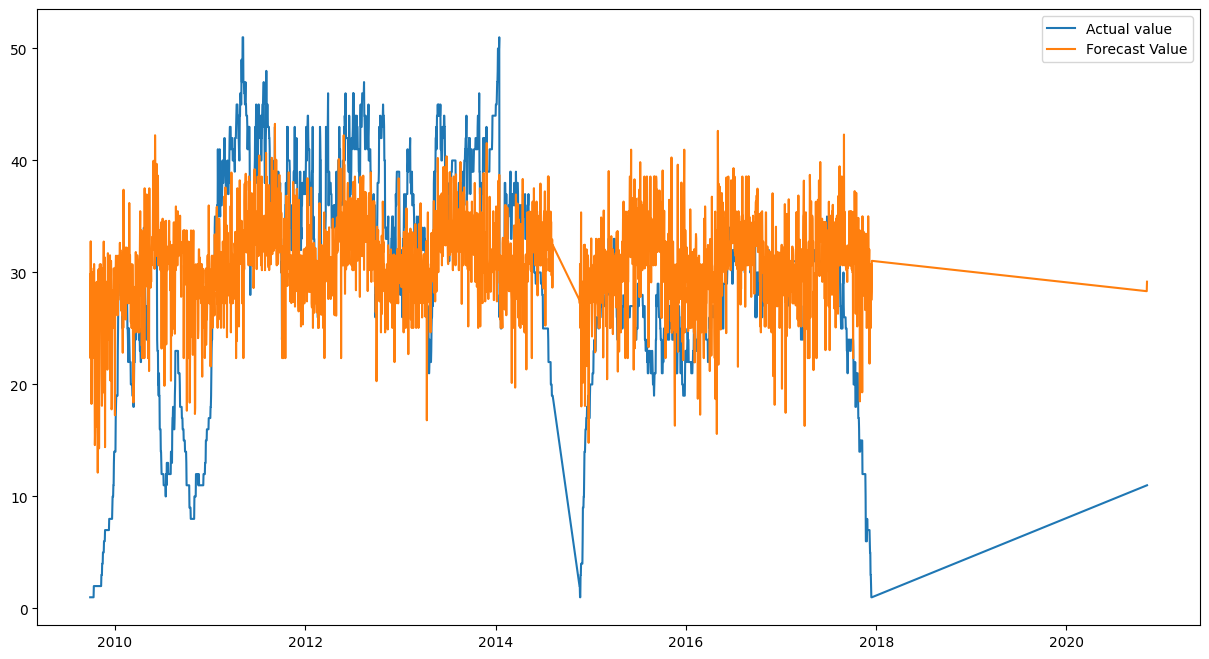

zz -Catholic Charities - D.C. General Men's - Hypothermia ES IND(closed 4/9/18)
MAE: 10.861225


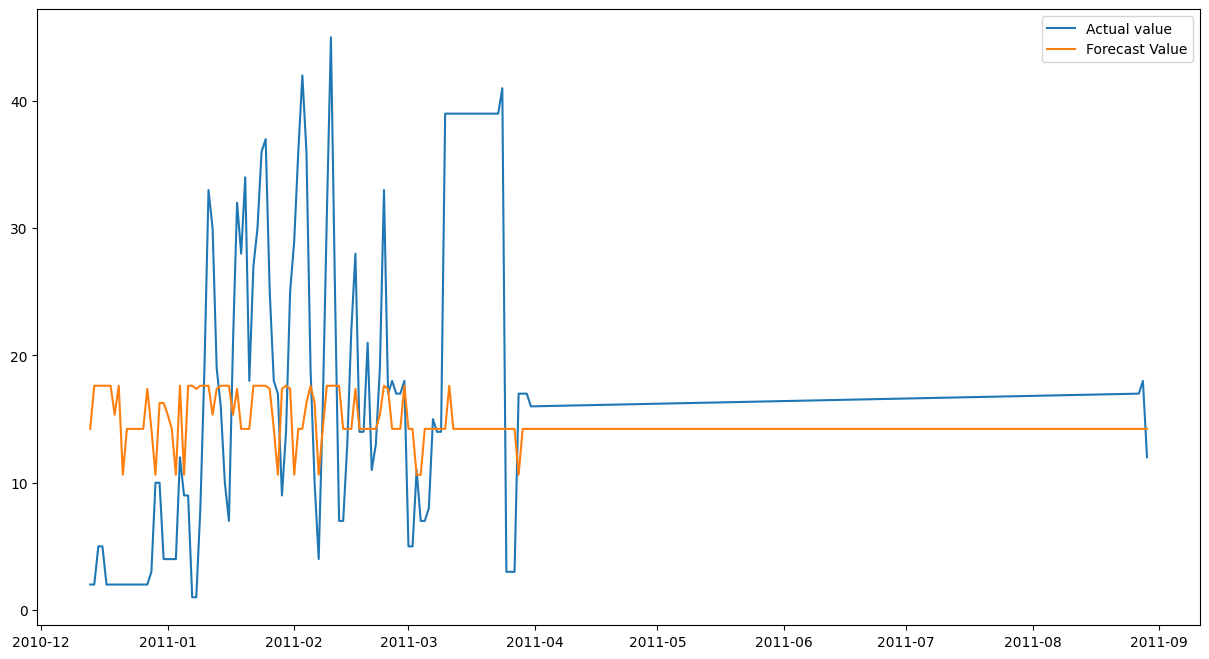

Catholic Charities - New Covenant Baptist Church - Hypothermia ES IND - DHS S
MAE: 7.750141


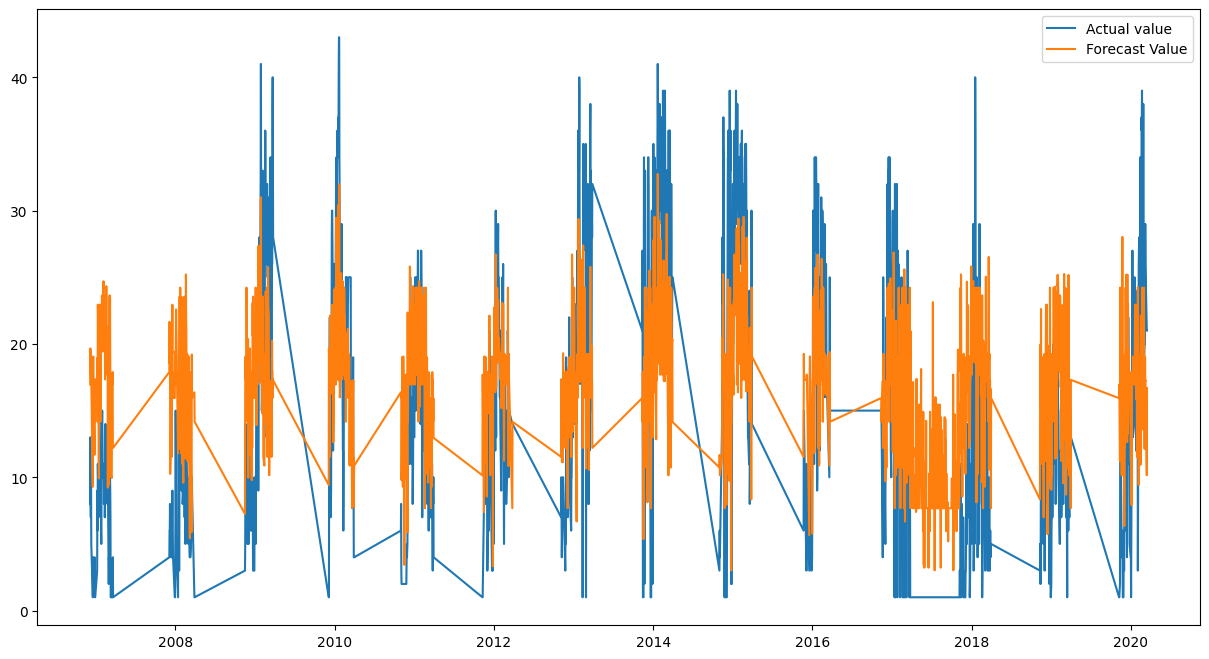

Casa Ruby - Low Barrier Shelter (CR3) -  ES IND Youth - DHS Direct
MAE: 4.988589


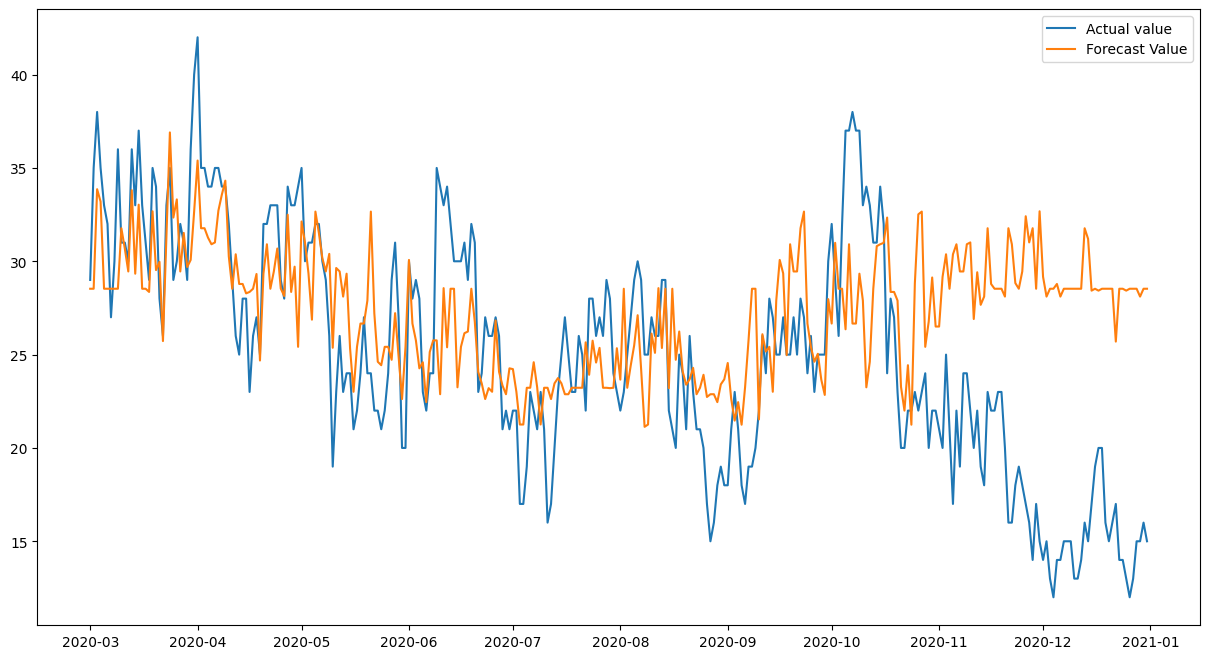

Catholic Charities - Community of Christ - Hypothermia ES IND - DHS S
MAE: 3.758993


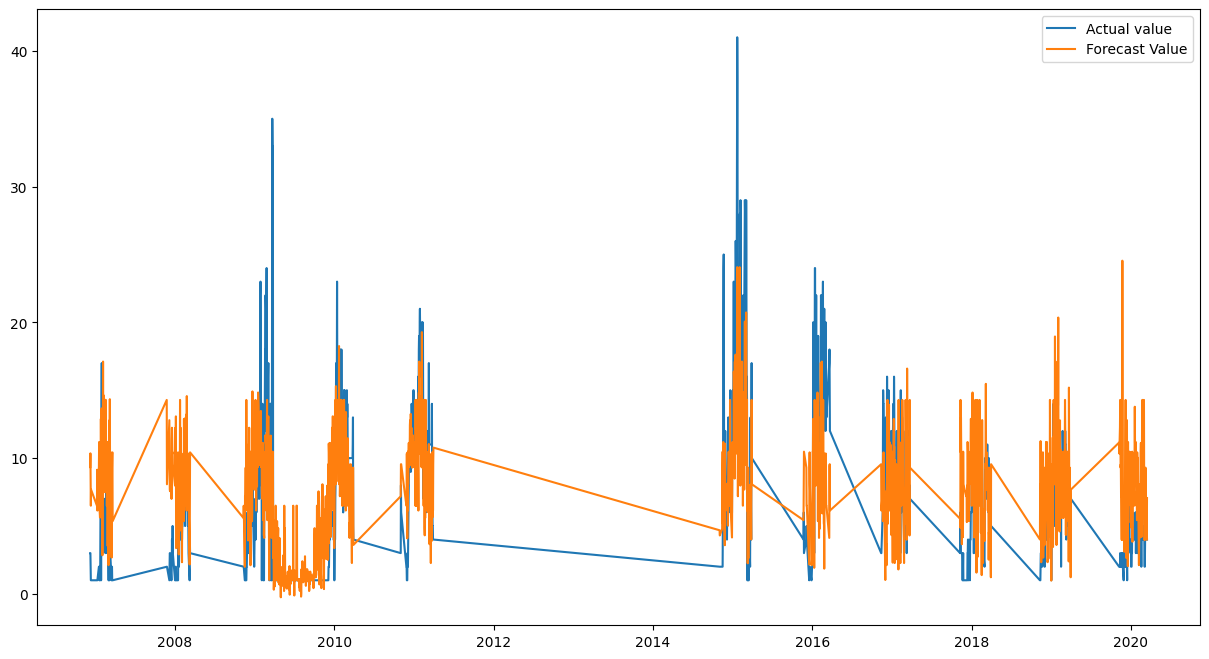

Catholic Charities - St. Josephine Bahkita Women's Shelter (Formerly Nativity) - LBS ES IND - DHS S
MAE: 2.811871


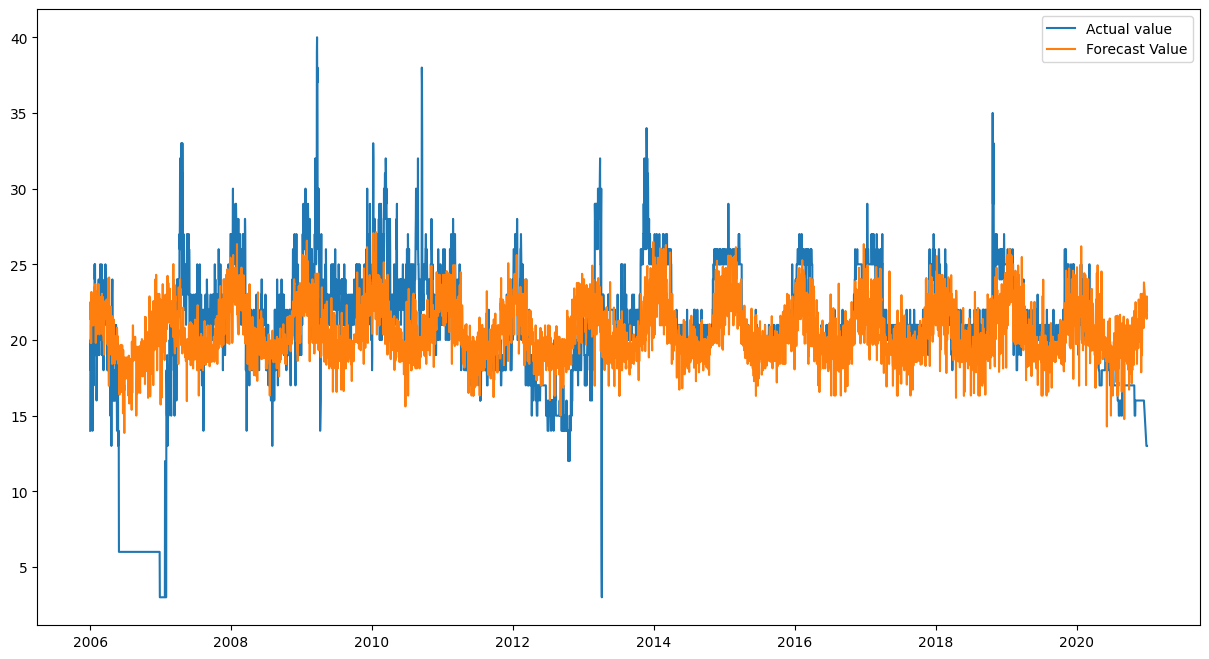

CHW - The Sanctuary - ES IND - DHS Direct
MAE: 5.274016


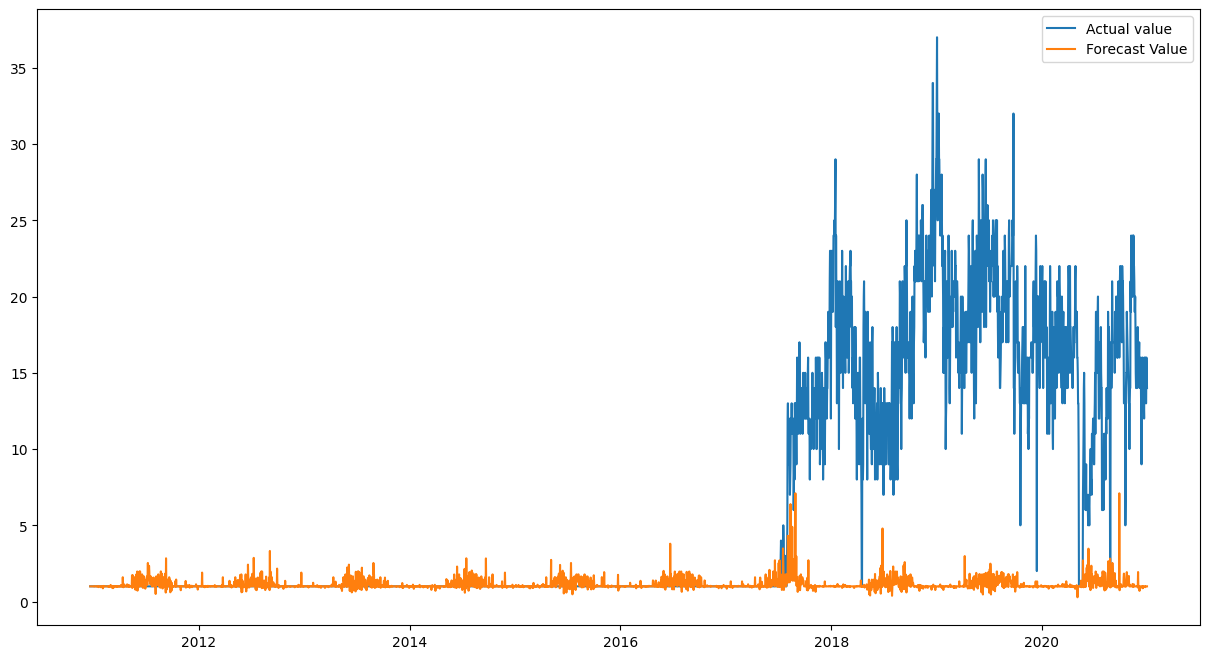

zz - Catholic Charities - Guy Mason Recreation Center (Program)(closed 2/13/19)
MAE: 9.386201


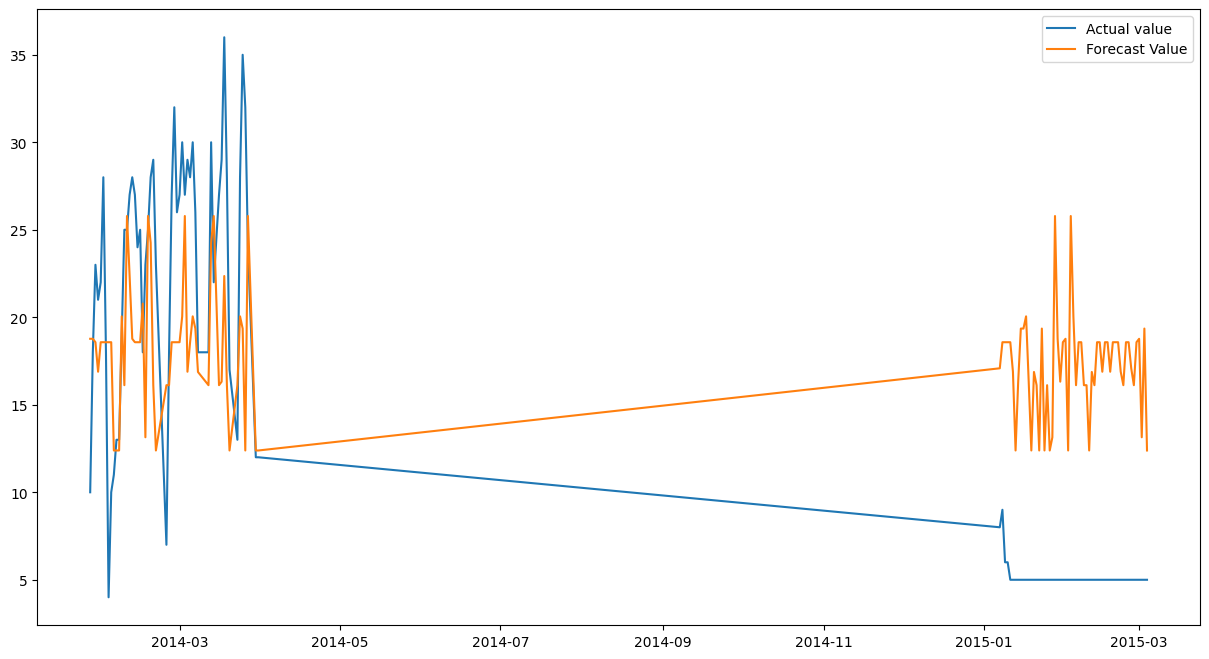

CFTH - 50th Street Family Shelter - ES FAM - DHS S
MAE: 8.222782


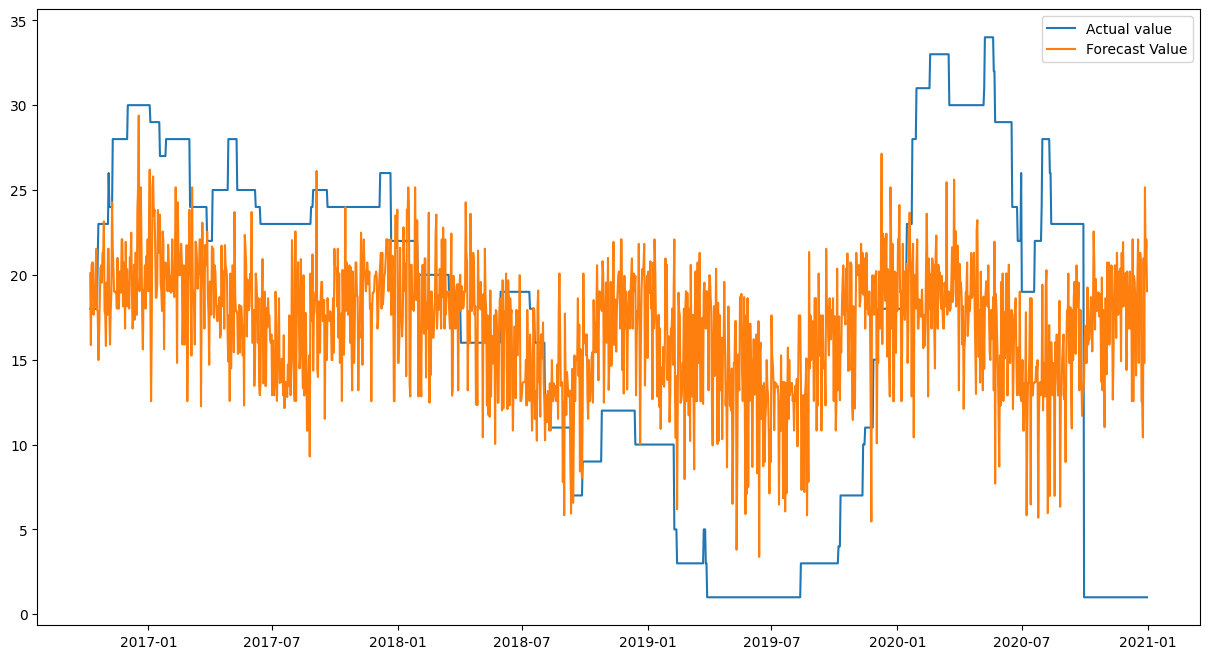

NSV - Eve's Place - LBS ES IND - DHS Direct - COVID
MAE: 3.223294


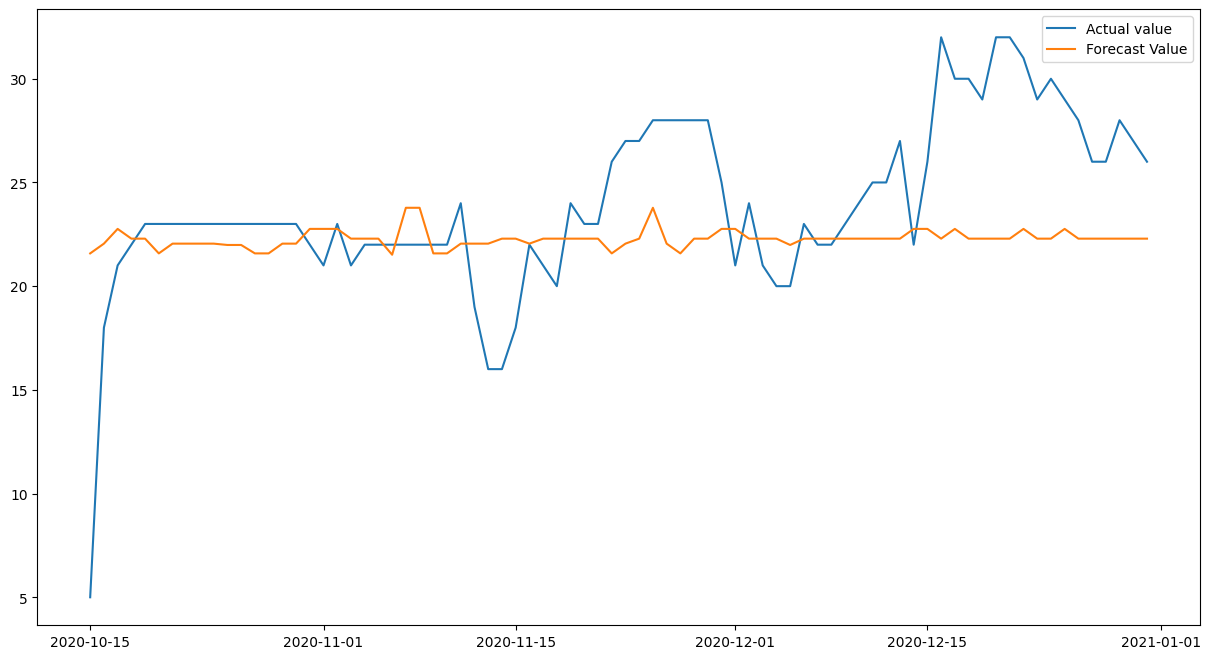

zz - Catholic Charities - First United Methodist Church - Hypothermia ES IND(closed 4/9/18)
MAE: 3.570415


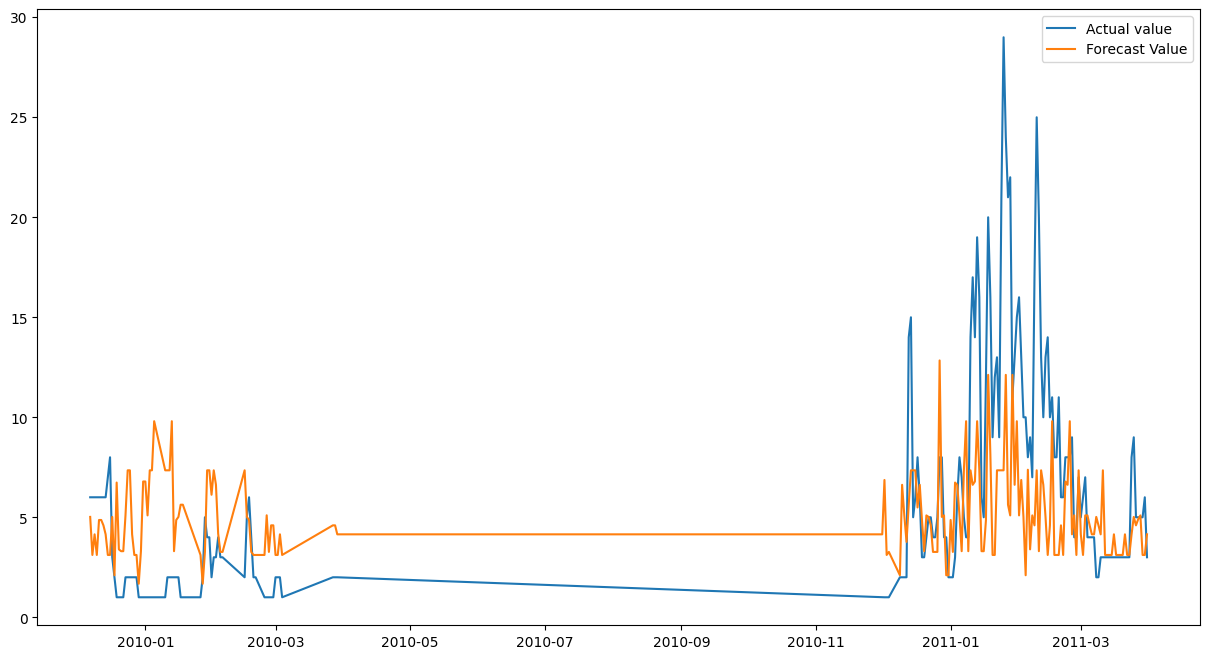

zz - Everyone Home DC -  Congregation Based Shelter - ES FAM - DHS S(closed 2020)
MAE: 5.160957


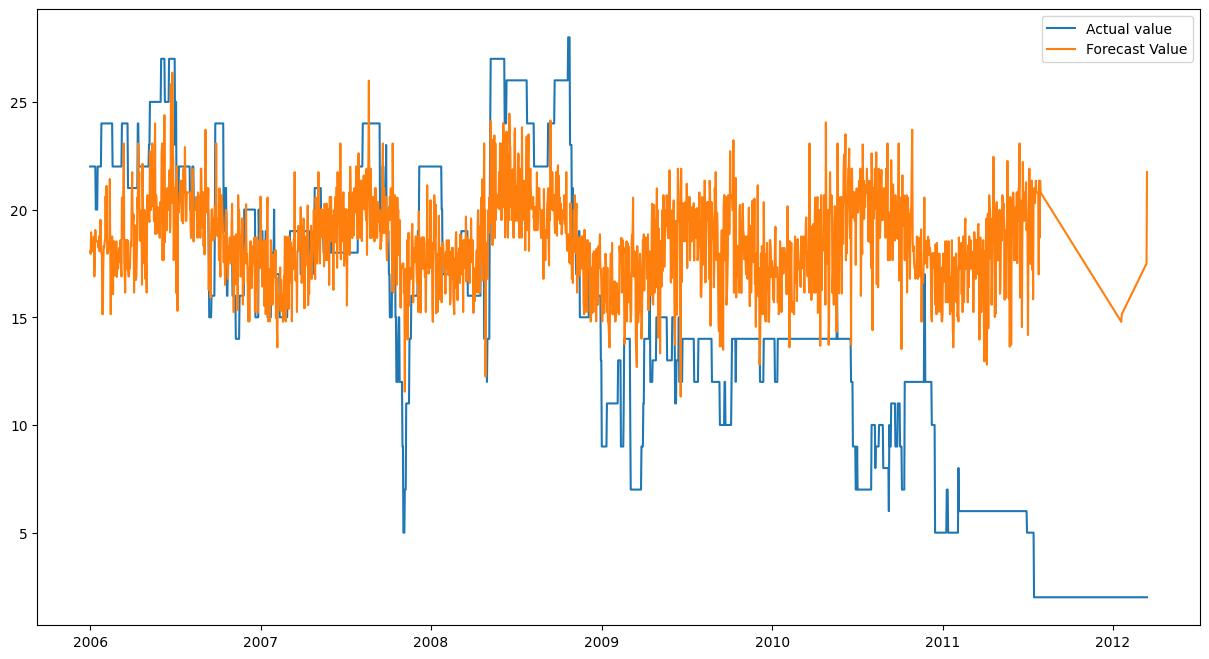

zz - Catholic Charities - First Rising Mt. Zion (Hypothermia Shelter) ES-IND(closed 4/9/18)
MAE: 5.446629


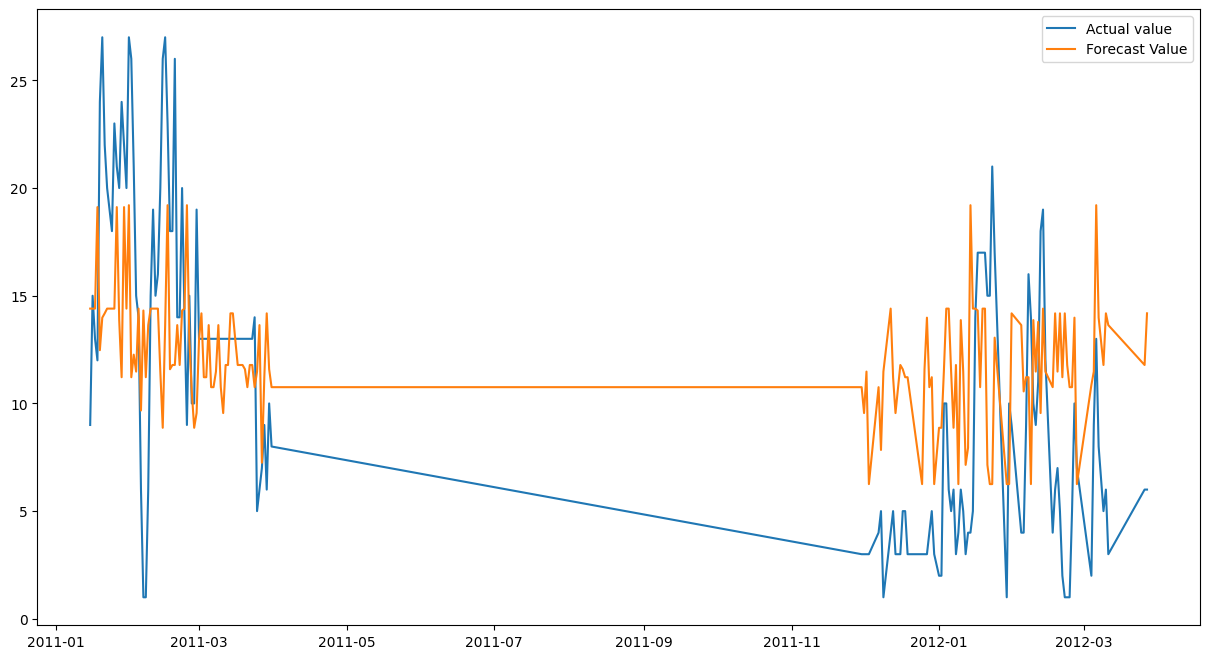

zz - DC General Family Shelter - ES FAM(closed 10/31/18)
MAE: 1.835000


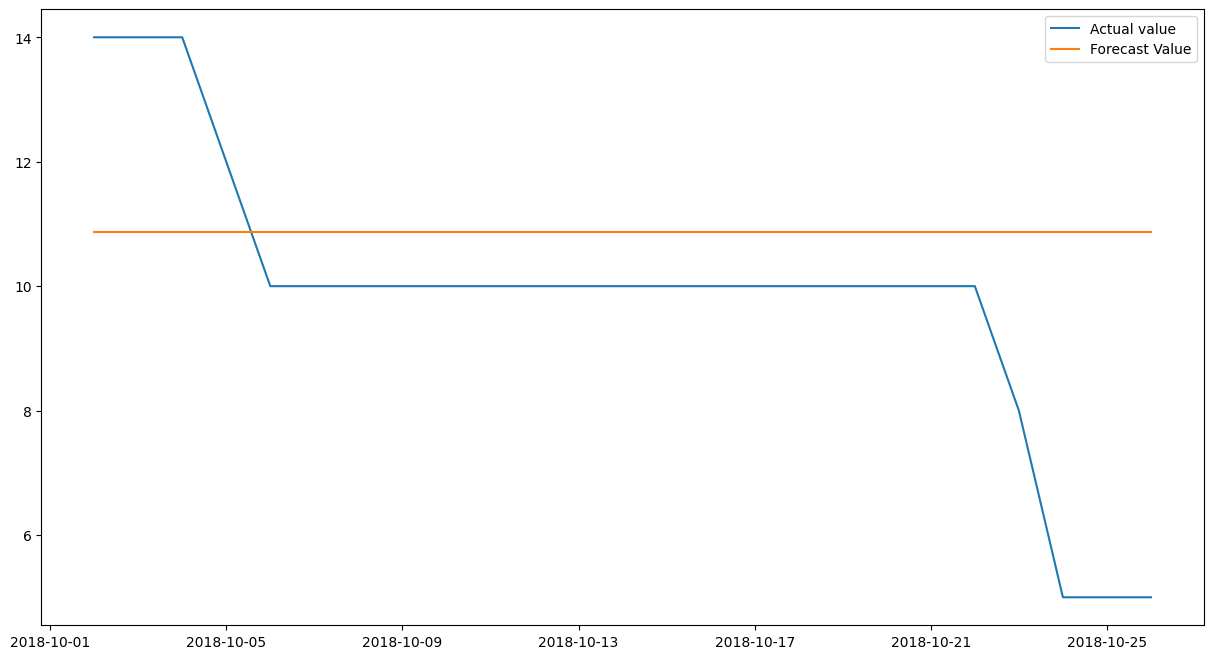

SBY - Sasha Bruce House - ES IND YOUTH - DHS S
MAE: 2.005926


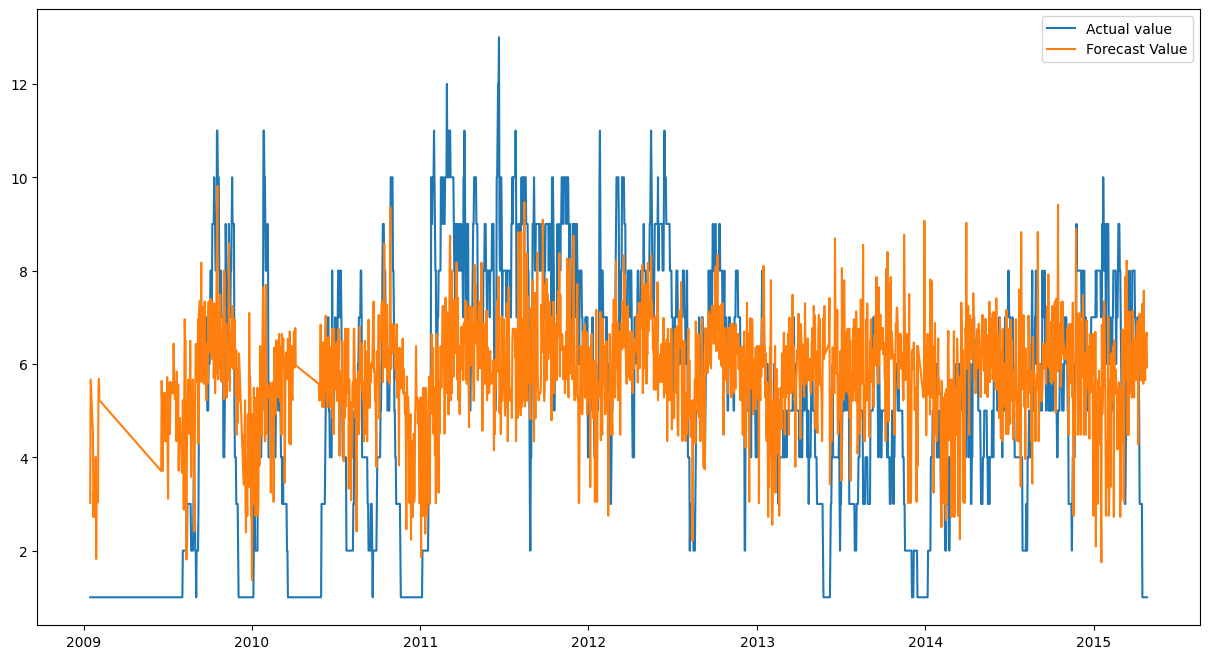

NSV - Patricia Handy  - Medical Respite Housing - ES IND - DHS M
MAE: 1.692355


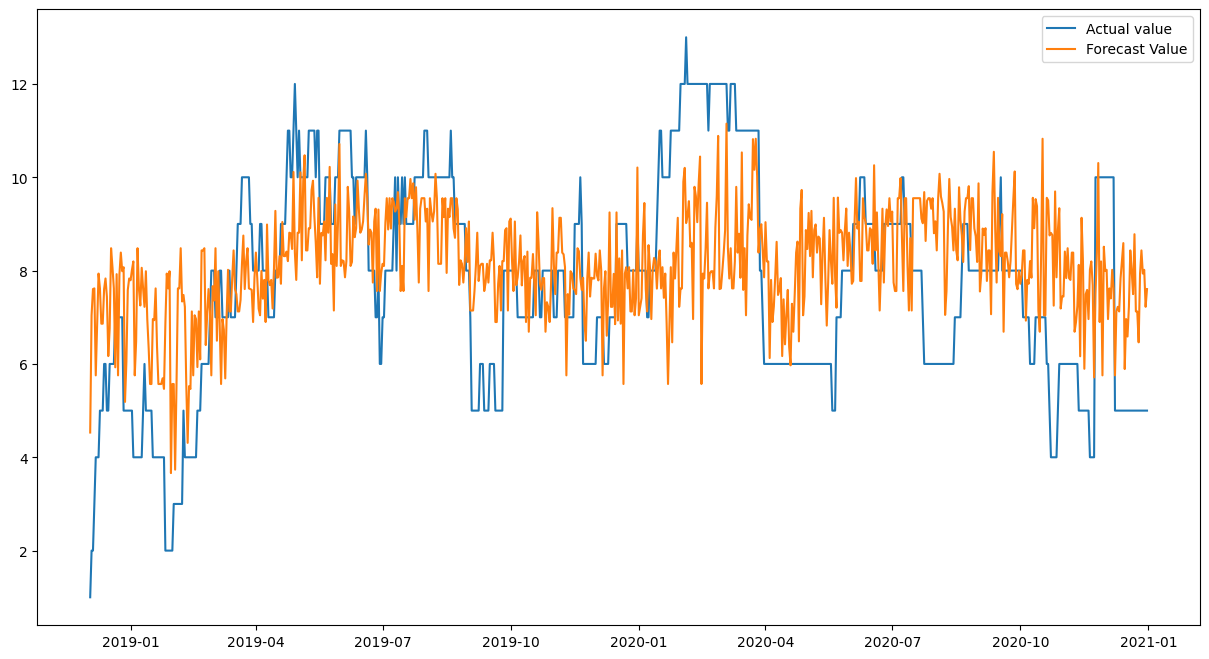

NSV - Patricia Handy - Senior Temporary Housing - ES IND - DHS M
MAE: 1.571909


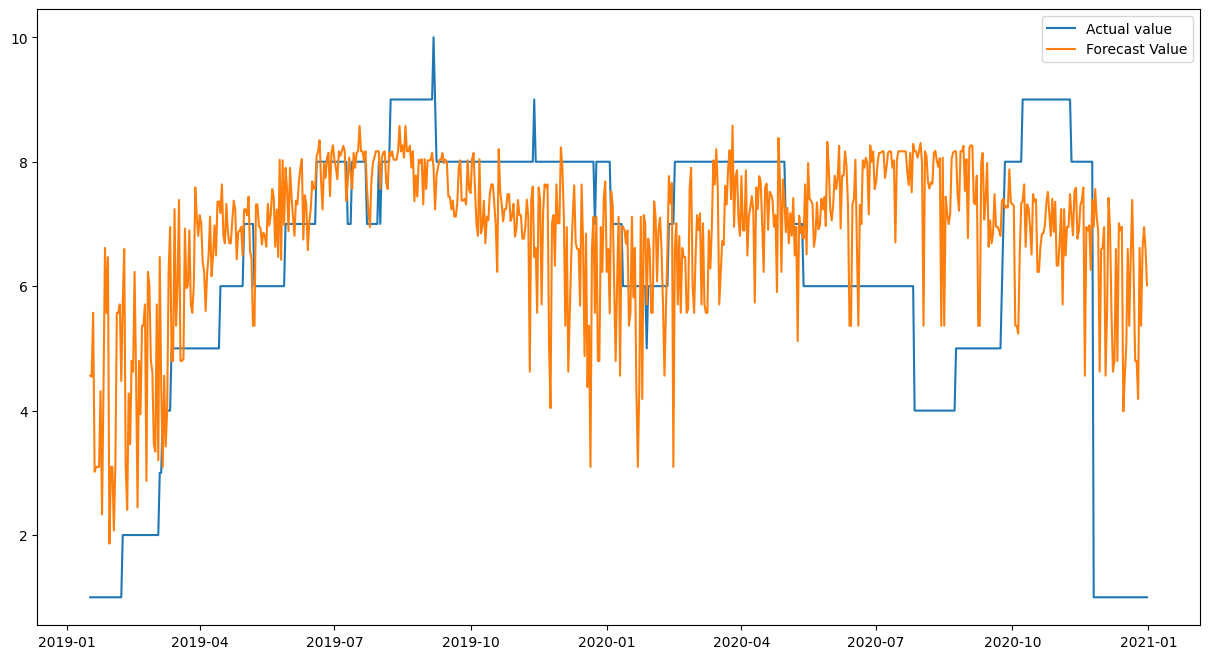

zz - DHS - Adams Drop-In Center Night Program - ES IND - DHS Direct(Closed 3/1/21)
MAE: 0.774955


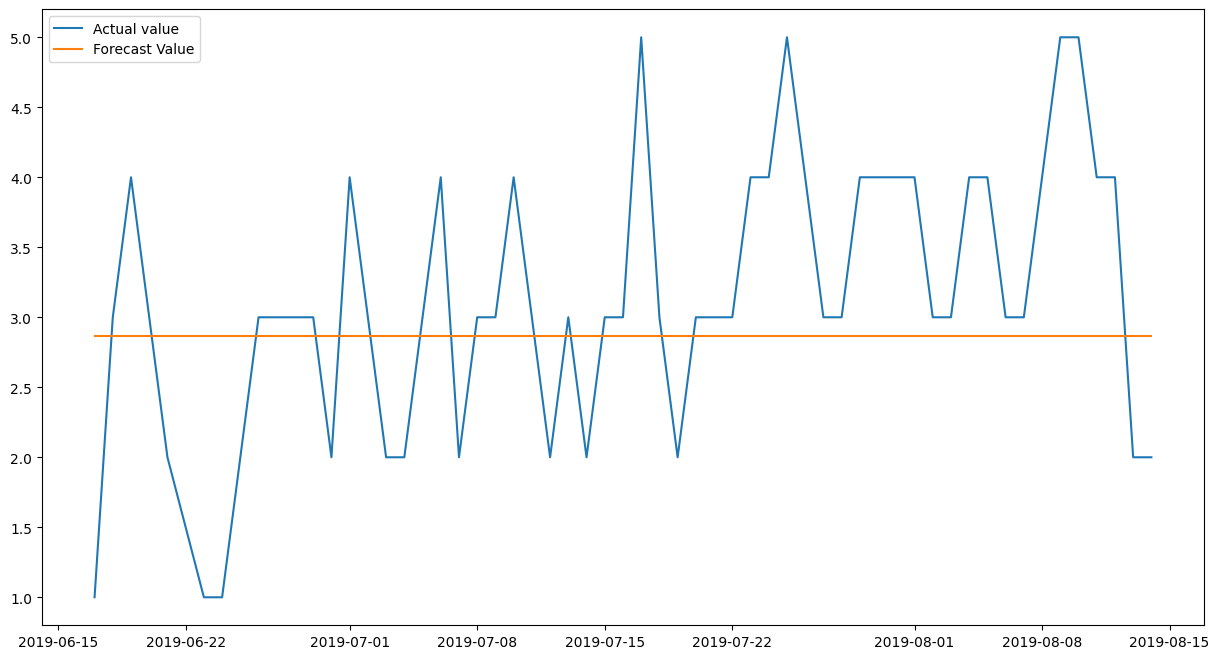

zz - Friendship Place - Congregation Units -ES(closed 3/31/08)
MAE: 0.650494


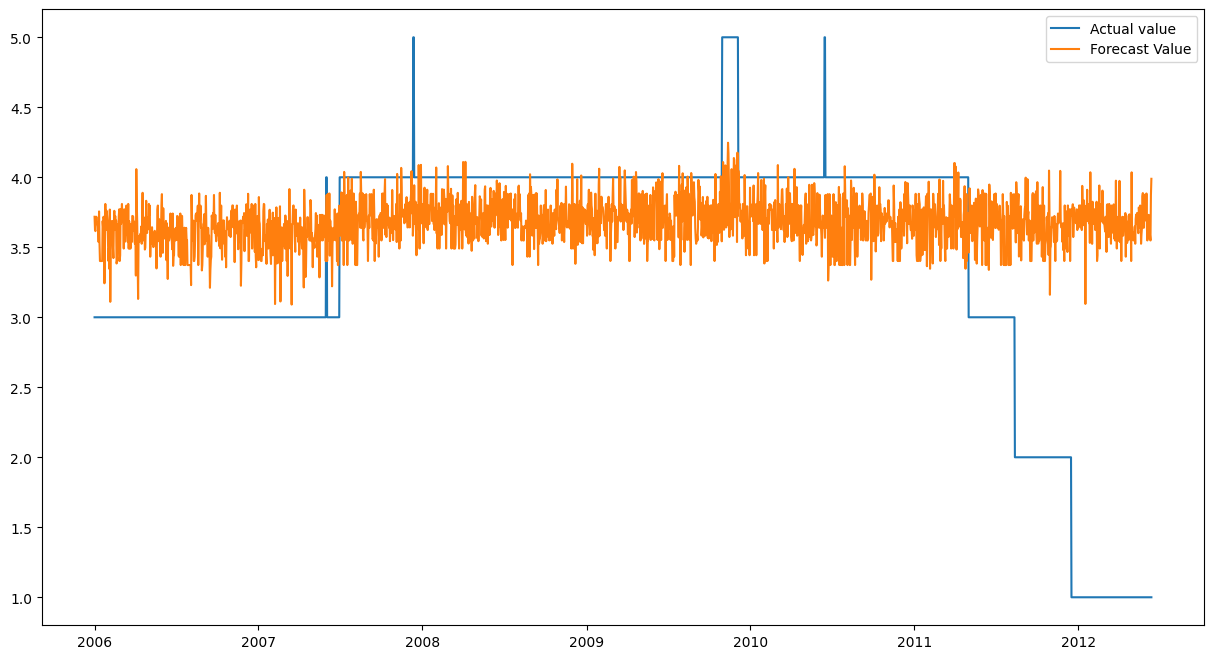

NCCF - Park Road Family Shelter - ES FAM - DHS S
MAE: 0.419162


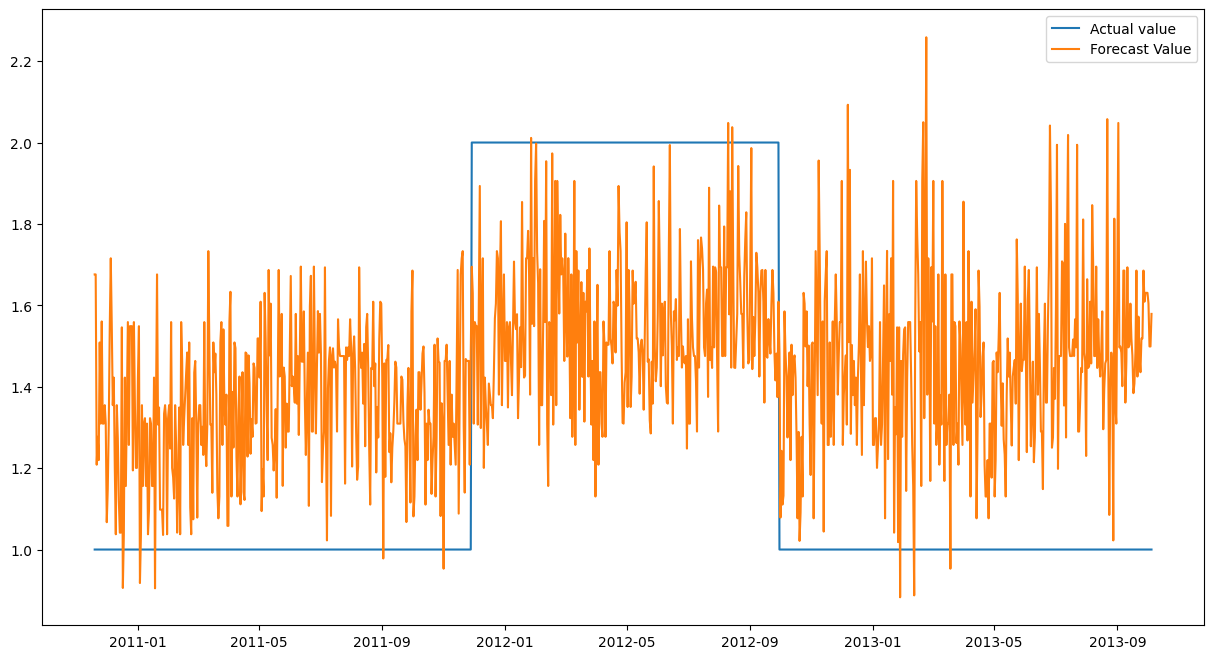

Casa Ruby - Short Term Housing (CR2) - ES IND Youth - DHS Direct
MAE: 0.500000


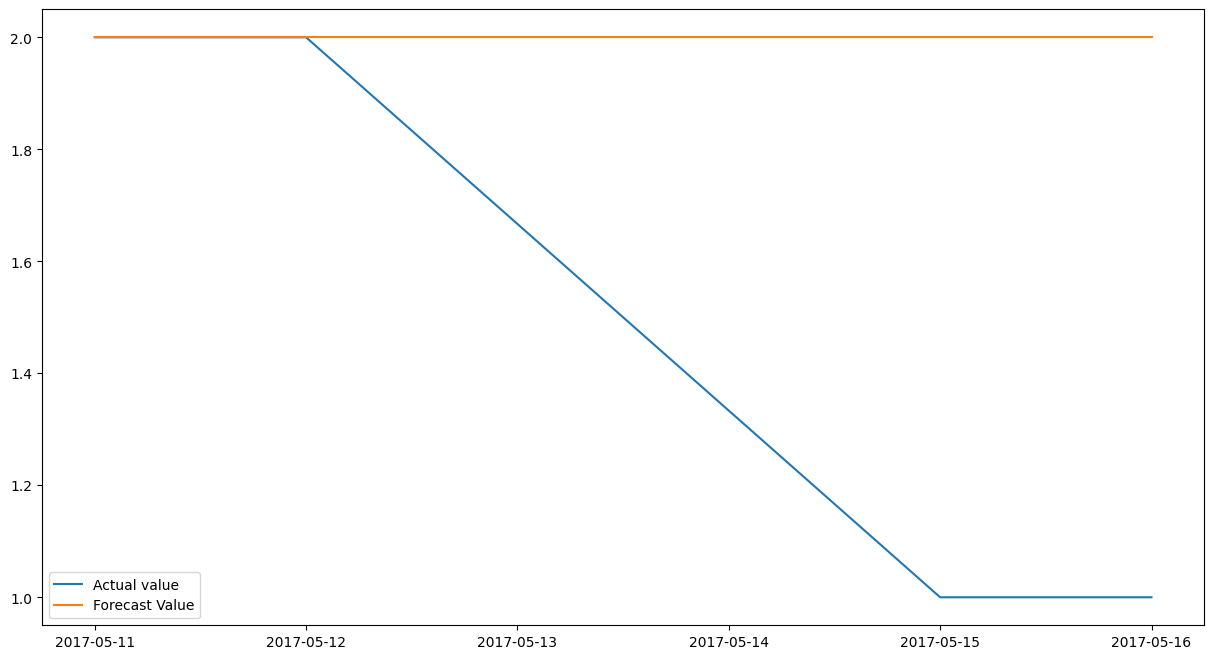

zz - DC Doors - Zoe's Doors <U+FFFD> ES IND Youth - DHS Direct(closed 1/1/2020)


In [8]:
data = data.sort_values('Total', ascending = False)

for shelter in data['name'].unique():
    # Create a TimeSeries, specifying the time and value columns
    print(shelter)
    model_data = data[data['name'] == shelter][['date', 'Total', 'MinTempF', 'PrecipIn', 'FreezingAtEntry']]
    model_data = model_data.sort_values('date').reset_index().fillna(0)
    
    try:
        X_train, X_test, y_train, y_test = train_test_split(model_data[['date', 'MinTempF', 'PrecipIn','FreezingAtEntry']] ,model_data['Total'], test_size=0.33,  shuffle=False)

        # fitting model
        params = {
                        'boosting_type': 'gbdt',
                        'objective': 'regression',
                        'metric': {'l2', 'l1'},
                        'learning_rate': 0.05,
                        'feature_fraction': 0.9,
                        'bagging_fraction': 0.8,
                        'bagging_freq': 5,
                        'verbose': -1,
                        'max_depth' : 5
                    }

        lgb_train = lgb.Dataset(X_train[['MinTempF', 'PrecipIn','FreezingAtEntry']], y_train)
        gbm = lgb.train(params,lgb_train,num_boost_round=500)

        forecast = list(gbm.predict(X_train[['MinTempF', 'PrecipIn', 'FreezingAtEntry']], num_iteration=gbm.best_iteration))
        final1 = pd.DataFrame()
        final1['date'] = X_train['date']
        final1['Total'] = y_train
        final1 = final1.reset_index()
        final1['Forecast'] = forecast

        forecast = list(gbm.predict(X_test[['MinTempF', 'PrecipIn','FreezingAtEntry']], num_iteration=gbm.best_iteration))
        final2 = pd.DataFrame()
        final2['date'] = X_test['date']
        final2['Total'] = y_test
        final2 = final2.reset_index()
        final2['Forecast'] = forecast

        final = final1.append(final2)
        final = final.reset_index()

        #error
        mae = mean_absolute_error(final.Total, final.Forecast)
        print('MAE: %f' % mae)

        #plotting feature importance
        #lgb.plot_importance(gbm)

        # plotting data
        plt.figure(figsize=(15,8))
        plt.plot(final.date, final.Total,label='Actual value')
        plt.plot(final.date, final.Forecast,label='Forecast Value')
        plt.legend()
        plt.show()
    
    except:
        pass